<a href="https://colab.research.google.com/github/Juanisazalu/TRABAJO-2/blob/main/TRABAJO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats

# EXPLORACION DE DATOS

In [191]:
tabla=pd.read_csv("CC GENERAL.csv")

Descripcion de las variables

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

Renombrar nombre de variables

In [192]:
tabla=tabla.rename(columns={"CUST_ID":"id","BALANCE":"saldo","BALANCE_FREQUENCY":"frecuenciaactsaldo","PURCHASES":"comprastotales","ONEOFF_PURCHASES":"montomaxcomprado","INSTALLMENTS_PURCHASES":"montoacuotas","CASH_ADVANCE":"anticipoefectivo","PURCHASES_FREQUENCY":"frecuenciacompras","ONEOFF_PURCHASES_FREQUENCY":"freccomprasunavez","PURCHASES_INSTALLMENTS_FREQUENCY":"freccomprasplazo","CASH_ADVANCE_FREQUENCY":"frecpagoantefectivo","CASH_ADVANCE_TRX":"ntranscashinadv","PURCHASES_TRX":"ntransacciones","CREDIT_LIMIT":"limtarjetacredito","PAYMENTS":"pagos","MINIMUM_PAYMENTS":"montominpagos","PRC_FULL_PAYMENT":"%totalpagado","TENURE":"antiguedad"})                                                                                            
tabla

id        saldo  frecuenciaactsaldo  comprastotales  \
0     C10001    40.900749            0.818182           95.40   
1     C10002  3202.467416            0.909091            0.00   
2     C10003  2495.148862            1.000000          773.17   
3     C10004  1666.670542            0.636364         1499.00   
4     C10005   817.714335            1.000000           16.00   
...      ...          ...                 ...             ...   
8945  C19186    28.493517            1.000000          291.12   
8946  C19187    19.183215            1.000000          300.00   
8947  C19188    23.398673            0.833333          144.40   
8948  C19189    13.457564            0.833333            0.00   
8949  C19190   372.708075            0.666667         1093.25   

      montomaxcomprado  montoacuotas  anticipoefectivo  frecuenciacompras  \
0                 0.00         95.40          0.000000           0.166667   
1                 0.00          0.00       6442.945483           0.000000   
2               773.17          0.00          0.000000           1.000000   
3              1499.00          0.00        205.788017           0.083333   
4                16.00          0.00          0.000000           0.083333   
...                ...           ...               ...                ...   
8945              0.00        291.12          0.000000           1.000000   
8946              0.00        300.00          0.000000           1.000000   
8947              0.00        144.40          0.000000           0.833333   
8948              0.00          0.00         36.558778           0.000000   
8949           1093.25          0.00        127.040008           0.666667   

      freccomprasunavez  freccomprasplazo  frecpagoantefectivo  \
0              0.000000          0.083333             0.000000   
1              0.000000          0.000000             0.250000   
2              1.000000          0.000000             0.000000   
3              0.083333          0.000000             0.083333   
4              0.083333          0.000000             0.000000   
...                 ...               ...                  ...   
8945           0.000000          0.833333             0.000000   
8946           0.000000          0.833333             0.000000   
8947           0.000000          0.666667             0.000000   
8948           0.000000          0.000000             0.166667   
8949           0.666667          0.000000             0.333333   

      ntranscashinadv  ntransacciones  limtarjetacredito        pagos  \
0                   0               2             1000.0   201.802084   
1                   4               0             7000.0  4103.032597   
2                   0              12             7500.0   622.066742   
3                   1               1             7500.0     0.000000   
4                   0               1             1200.0   678.334763   
...               ...             ...                ...          ...   
8945                0               6             1000.0   325.594462   
8946                0               6             1000.0   275.861322   
8947                0               5             1000.0    81.270775   
8948                2               0              500.0    52.549959   
8949                2              23             1200.0    63.165404   

      montominpagos  %totalpagado  antiguedad  
0        139.509787      0.000000          12  
1       1072.340217      0.222222          12  
2        627.284787      0.000000          12  
3               NaN      0.000000          12  
4        244.791237      0.000000          12  
...             ...           ...         ...  
8945      48.886365      0.500000           6  
8946            NaN      0.000000           6  
8947      82.418369      0.250000           6  
8948      55.755628      0.250000           6  
8949      88.288956      0.000000           6  

[8950 rows x 18 columns]

In [134]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8950 non-null   object 
 1   saldo                8950 non-null   float64
 2   frecuenciaactsaldo   8950 non-null   float64
 3   comprastotales       8950 non-null   float64
 4   montomaxcomprado     8950 non-null   float64
 5   montoacuotas         8950 non-null   float64
 6   anticipoefectivo     8950 non-null   float64
 7   frecuenciacompras    8950 non-null   float64
 8   freccomprasunavez    8950 non-null   float64
 9   freccomprasplazo     8950 non-null   float64
 10  frecpagoantefectivo  8950 non-null   float64
 11  ntranscashinadv      8950 non-null   int64  
 12  ntransacciones       8950 non-null   int64  
 13  limtarjetacredito    8949 non-null   float64
 14  pagos                8950 non-null   float64
 15  montominpagos        8637 non-null   f

Se elimina la variable ID

In [193]:
tabla.drop("id",axis=1,inplace=True)

## EDA

In [194]:
tabla.isnull().sum()

saldo                    0
frecuenciaactsaldo       0
comprastotales           0
montomaxcomprado         0
montoacuotas             0
anticipoefectivo         0
frecuenciacompras        0
freccomprasunavez        0
freccomprasplazo         0
frecpagoantefectivo      0
ntranscashinadv          0
ntransacciones           0
limtarjetacredito        1
pagos                    0
montominpagos          313
%totalpagado             0
antiguedad               0
dtype: int64

Relleno de nulos

Buscamos la distribucion de la variable montominpagos para llenar adecuadamente los nulos

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad8237c760>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad8237cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad8237c490>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad8237d1e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad8237d480>],
 'means': []}

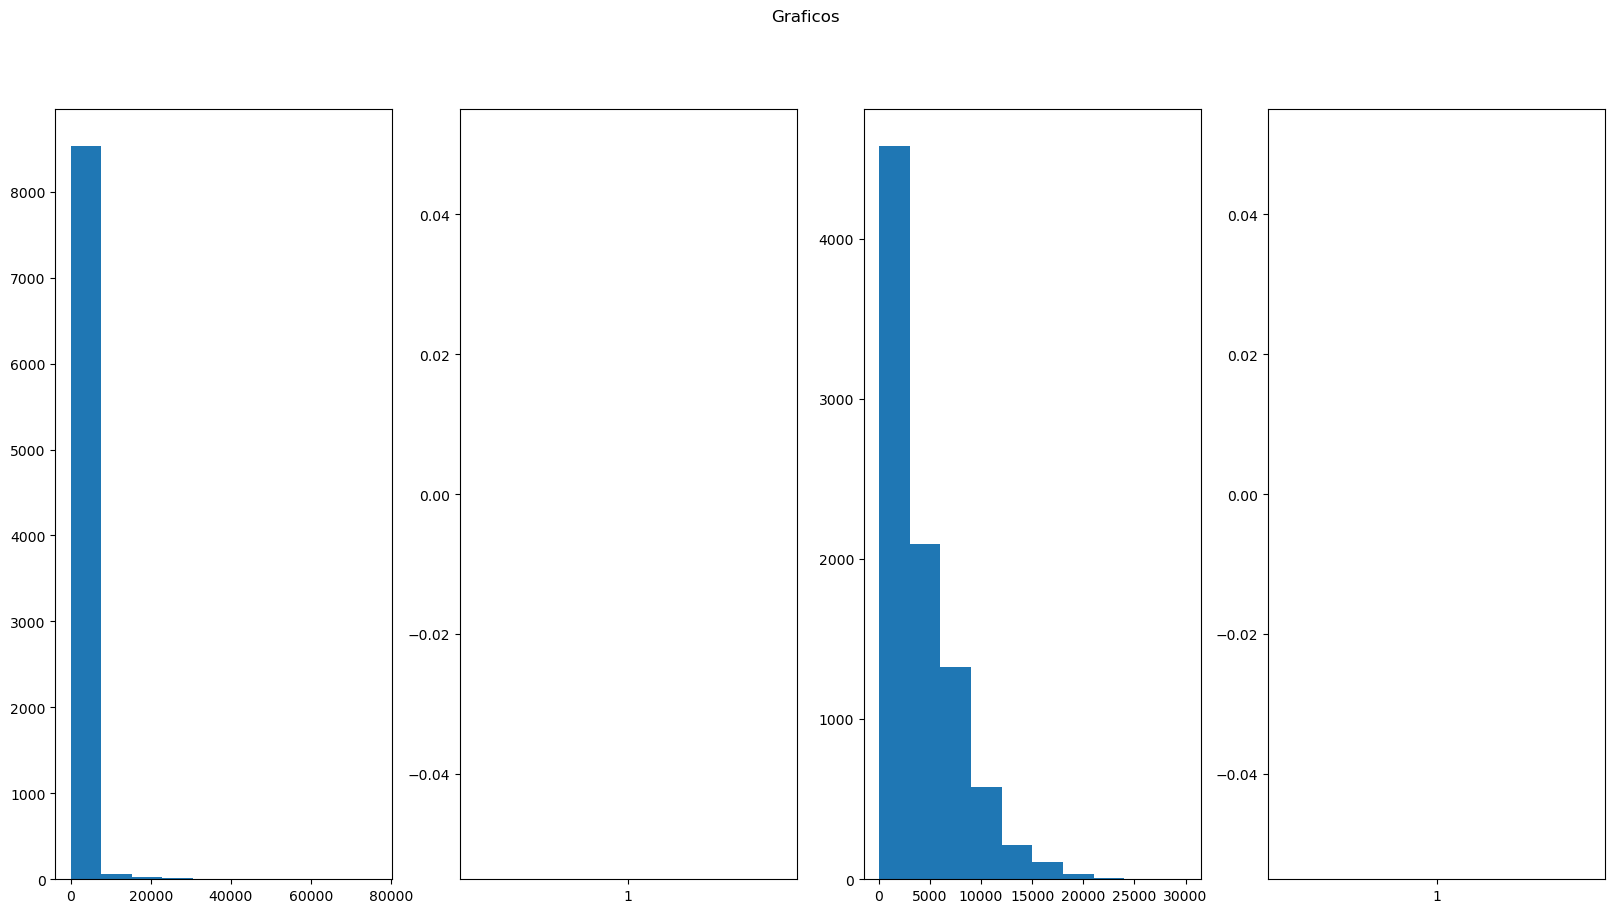

In [104]:
fig, ax= plt.subplots(figsize=(20,10), nrows=1, ncols=4)
fig.suptitle("Graficos")
ax[0].hist(tabla["montominpagos"])
ax[1].boxplot(tabla["montominpagos"]) 
ax[2].hist(tabla["limtarjetacredito"]) 
ax[3].boxplot(tabla["limtarjetacredito"]) 

Relleno de nulos con la media en ambas variables

In [195]:
tabla.fillna(tabla.mean(),inplace=True)
tabla.isnull().sum()


saldo                  0
frecuenciaactsaldo     0
comprastotales         0
montomaxcomprado       0
montoacuotas           0
anticipoefectivo       0
frecuenciacompras      0
freccomprasunavez      0
freccomprasplazo       0
frecpagoantefectivo    0
ntranscashinadv        0
ntransacciones         0
limtarjetacredito      0
pagos                  0
montominpagos          0
%totalpagado           0
antiguedad             0
dtype: int64

Prueba de normalidad

Como se observa en el siguiente codigo, la variables siguen una distribucion normal, por lo tanto se realizar el el algoritmo de mezclas gauseanas

In [196]:
import pandas as pd
from scipy import stats
import random
columnas = []
valores = []
tamaño_muestra = 100
for feature_name in tabla.columns:
    columnas.append(feature_name)
    muestra = random.sample(tabla[feature_name].tolist(), tamaño_muestra)
    shapiro_test = stats.shapiro(muestra)
    valores.append(shapiro_test[1])
resumenprueba = pd.DataFrame({"Variables": columnas, "P_value": valores})
alpha=0.05
resumenprueba["normalidad"]=resumenprueba["P_value"].apply(lambda x: "distribucion normal" if x <alpha else "otra distribucion")
resumenprueba

Variables       P_value           normalidad
0                 saldo  3.059519e-11  distribucion normal
1    frecuenciaactsaldo  4.269115e-14  distribucion normal
2        comprastotales  4.426859e-18  distribucion normal
3      montomaxcomprado  3.967161e-20  distribucion normal
4          montoacuotas  8.836266e-14  distribucion normal
5      anticipoefectivo  9.068450e-20  distribucion normal
6     frecuenciacompras  2.020377e-09  distribucion normal
7     freccomprasunavez  1.024803e-13  distribucion normal
8      freccomprasplazo  6.800473e-10  distribucion normal
9   frecpagoantefectivo  1.899307e-11  distribucion normal
10      ntranscashinadv  1.198877e-15  distribucion normal
11       ntransacciones  1.440821e-13  distribucion normal
12    limtarjetacredito  2.281706e-10  distribucion normal
13                pagos  5.720881e-15  distribucion normal
14        montominpagos  1.468796e-13  distribucion normal
15         %totalpagado  2.062972e-13  distribucion normal
16           antiguedad  1.211765e-18  distribucion normal

Correlacion de variables

<Axes: >

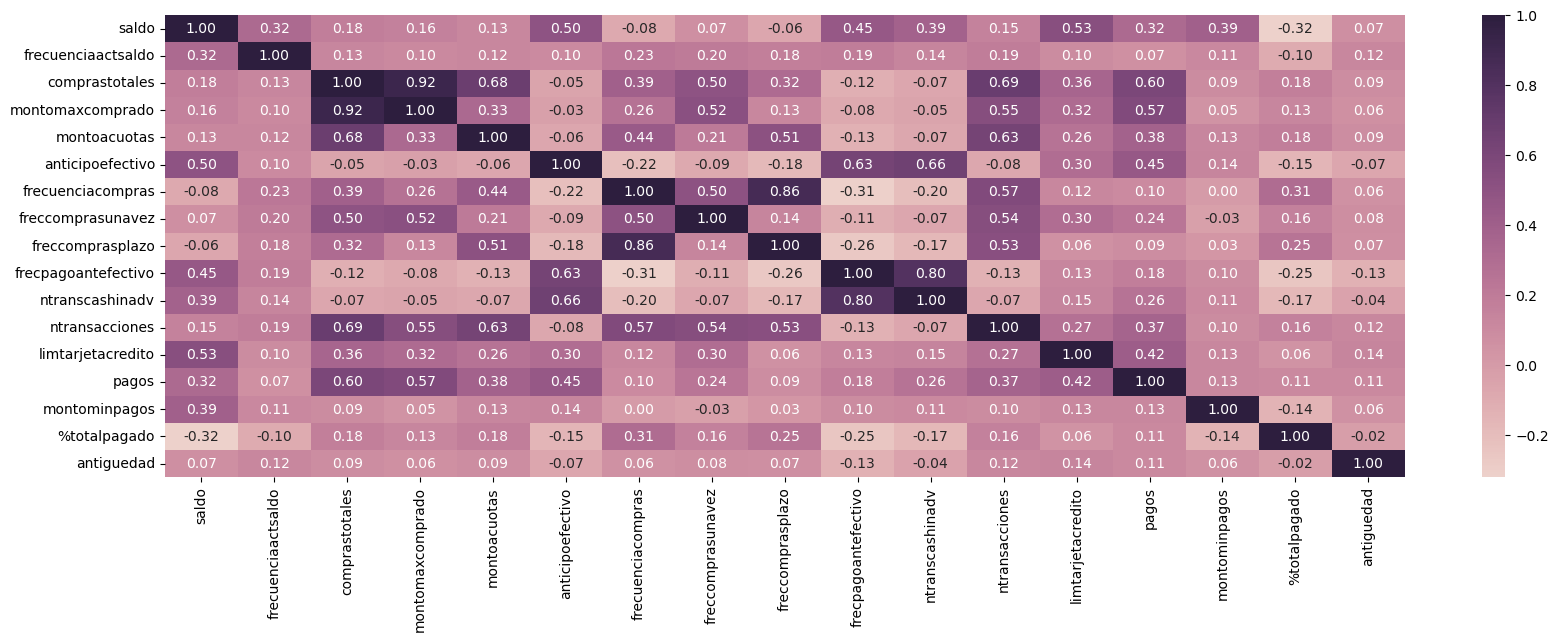

In [197]:
figure(figsize=(20,6))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

Se decide eliminar la variable compras totales, frecuencia de compras a plazo,frecuencia pago en efectivo

In [198]:
tabla.drop(["comprastotales","freccomprasplazo","frecpagoantefectivo"],axis=1,inplace=True)

<Axes: >

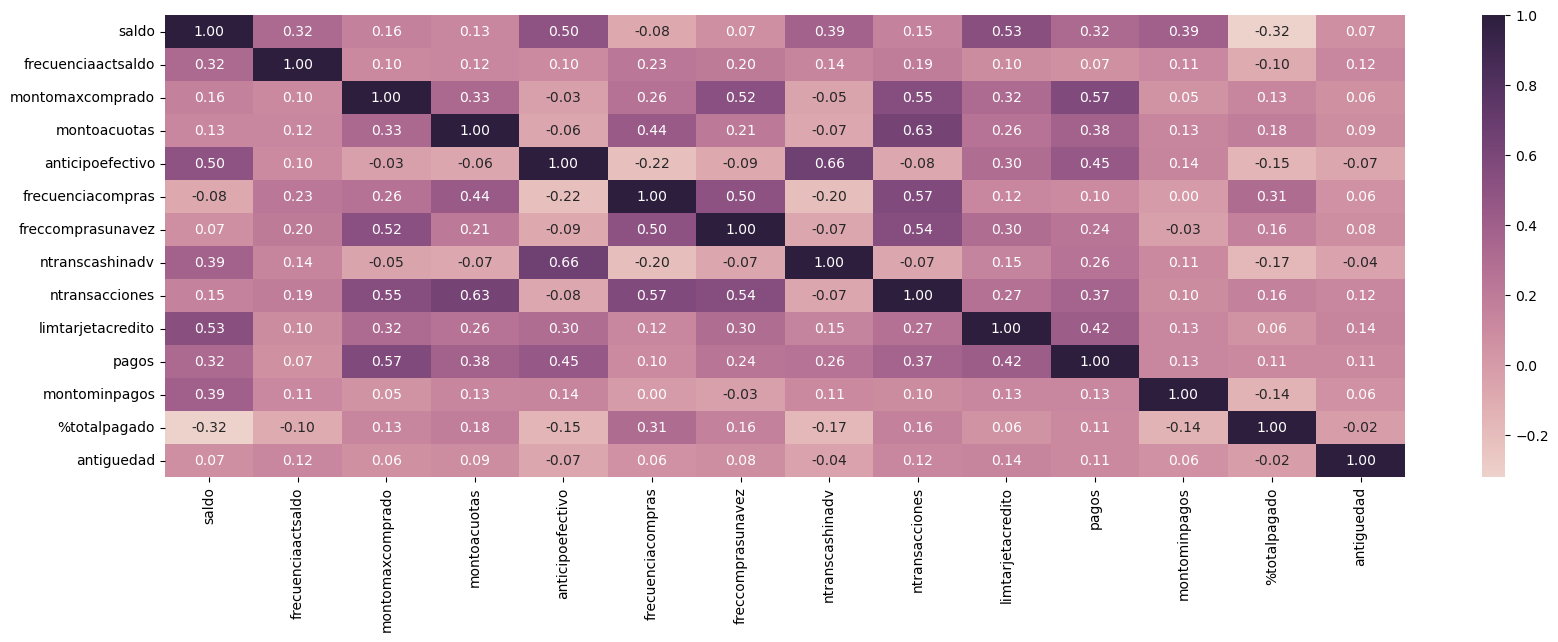

In [199]:
figure(figsize=(20,6))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

hacer analisis de variables que se correlacionen

In [150]:
len(tabla.columns)

14

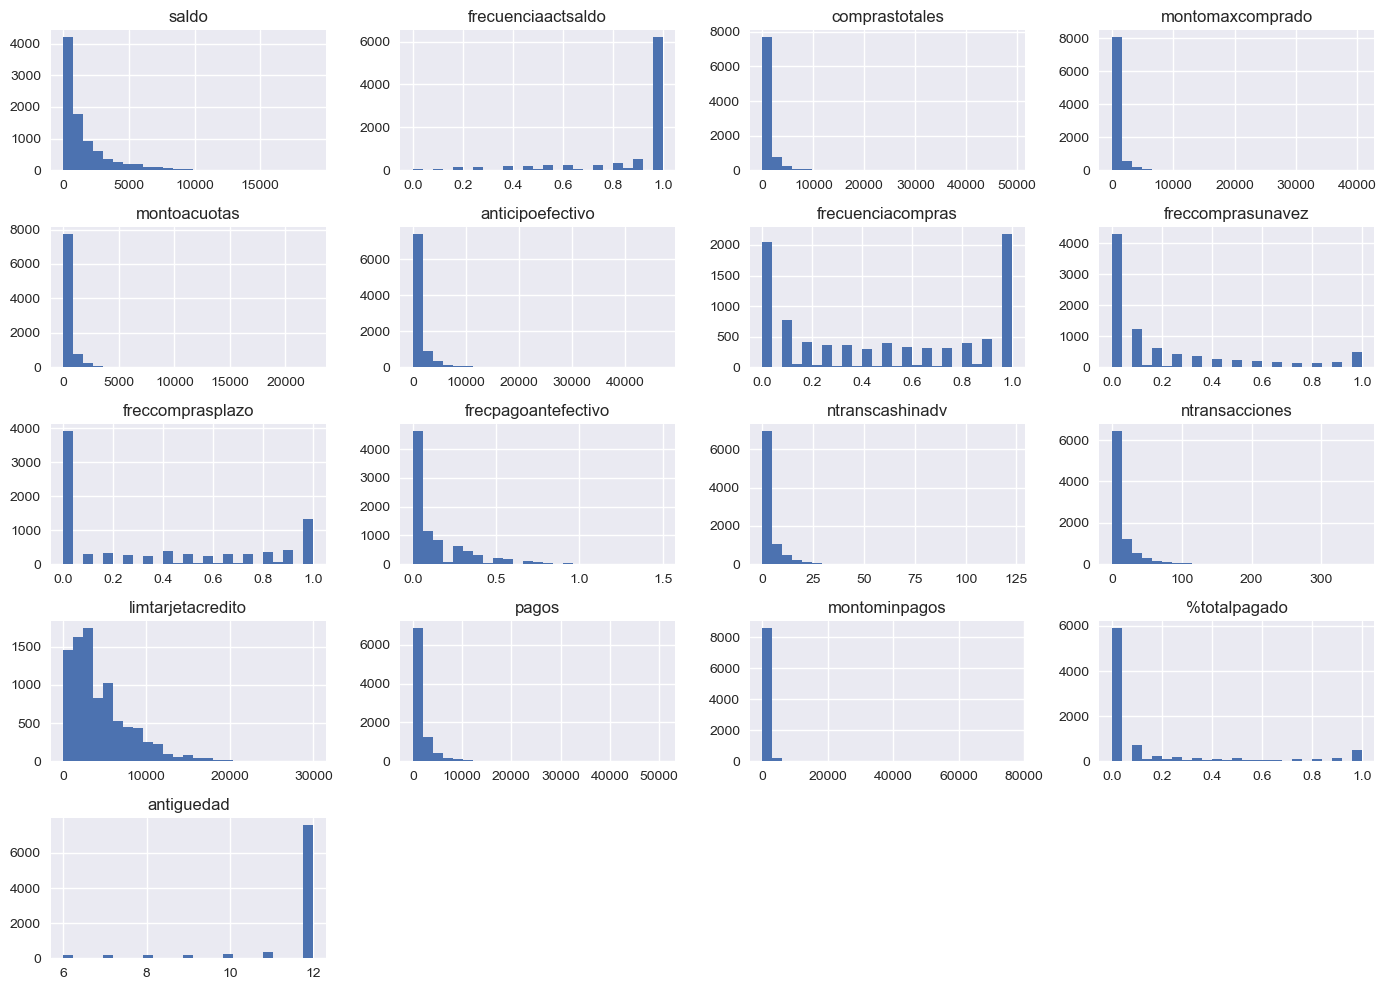

In [632]:
tabla.hist(figsize=(14,10), bins=25)
plt.tight_layout()
plt.show()

Escalado de variables

In [200]:
scaler = StandardScaler()
scaled_tabla=pd.DataFrame(scaler.fit_transform(tabla),columns=tabla.columns)
scaled_tabla


saldo  frecuenciaactsaldo  montomaxcomprado  montoacuotas  \
0    -0.731989           -0.249434         -0.356934     -0.349079   
1     0.786961            0.134325         -0.356934     -0.454576   
2     0.447135            0.518084          0.108889     -0.454576   
3     0.049099           -1.016953          0.546189     -0.454576   
4    -0.358775            0.518084         -0.347294     -0.454576   
...        ...                 ...               ...           ...   
8945 -0.737950            0.518084         -0.356934     -0.132643   
8946 -0.742423            0.518084         -0.356934     -0.122823   
8947 -0.740398           -0.185477         -0.356934     -0.294893   
8948 -0.745174           -0.185477         -0.356934     -0.454576   
8949 -0.572575           -0.889033          0.301732     -0.454576   

      anticipoefectivo  frecuenciacompras  freccomprasunavez  ntranscashinadv  \
0            -0.466786          -0.806490          -0.678661        -0.476070   
1             2.605605          -1.221758          -0.678661         0.110074   
2            -0.466786           1.269843           2.673451        -0.476070   
3            -0.368653          -1.014125          -0.399319        -0.329534   
4            -0.466786          -1.014125          -0.399319        -0.476070   
...                ...                ...                ...              ...   
8945         -0.466786           1.269843          -0.678661        -0.476070   
8946         -0.466786           1.269843          -0.678661        -0.476070   
8947         -0.466786           0.854576          -0.678661        -0.476070   
8948         -0.449352          -1.221758          -0.678661        -0.182998   
8949         -0.406205           0.439310           1.556082        -0.182998   

      ntransacciones  limtarjetacredito     pagos  montominpagos  \
0          -0.511333          -0.960433 -0.528979  -3.109675e-01   
1          -0.591796           0.688639  0.818642   8.931021e-02   
2          -0.109020           0.826062 -0.383805  -1.016632e-01   
3          -0.551565           0.826062 -0.598688   4.878305e-17   
4          -0.551565          -0.905464 -0.364368  -2.657913e-01   
...              ...                ...       ...            ...   
8945       -0.350408          -0.960433 -0.486217  -3.498541e-01   
8946       -0.350408          -0.960433 -0.503396   4.878305e-17   
8947       -0.390639          -0.960433 -0.570615  -3.354655e-01   
8948       -0.591796          -1.097856 -0.580536  -3.469065e-01   
8949        0.333524          -0.905464 -0.576869  -3.329464e-01   

      %totalpagado  antiguedad  
0        -0.525551    0.360680  
1         0.234227    0.360680  
2        -0.525551    0.360680  
3        -0.525551    0.360680  
4        -0.525551    0.360680  
...            ...         ...  
8945      1.183951   -4.122768  
8946     -0.525551   -4.122768  
8947      0.329200   -4.122768  
8948      0.329200   -4.122768  
8949     -0.525551   -4.122768  

[8950 rows x 14 columns]

## Tratamiendo de valares atipicos

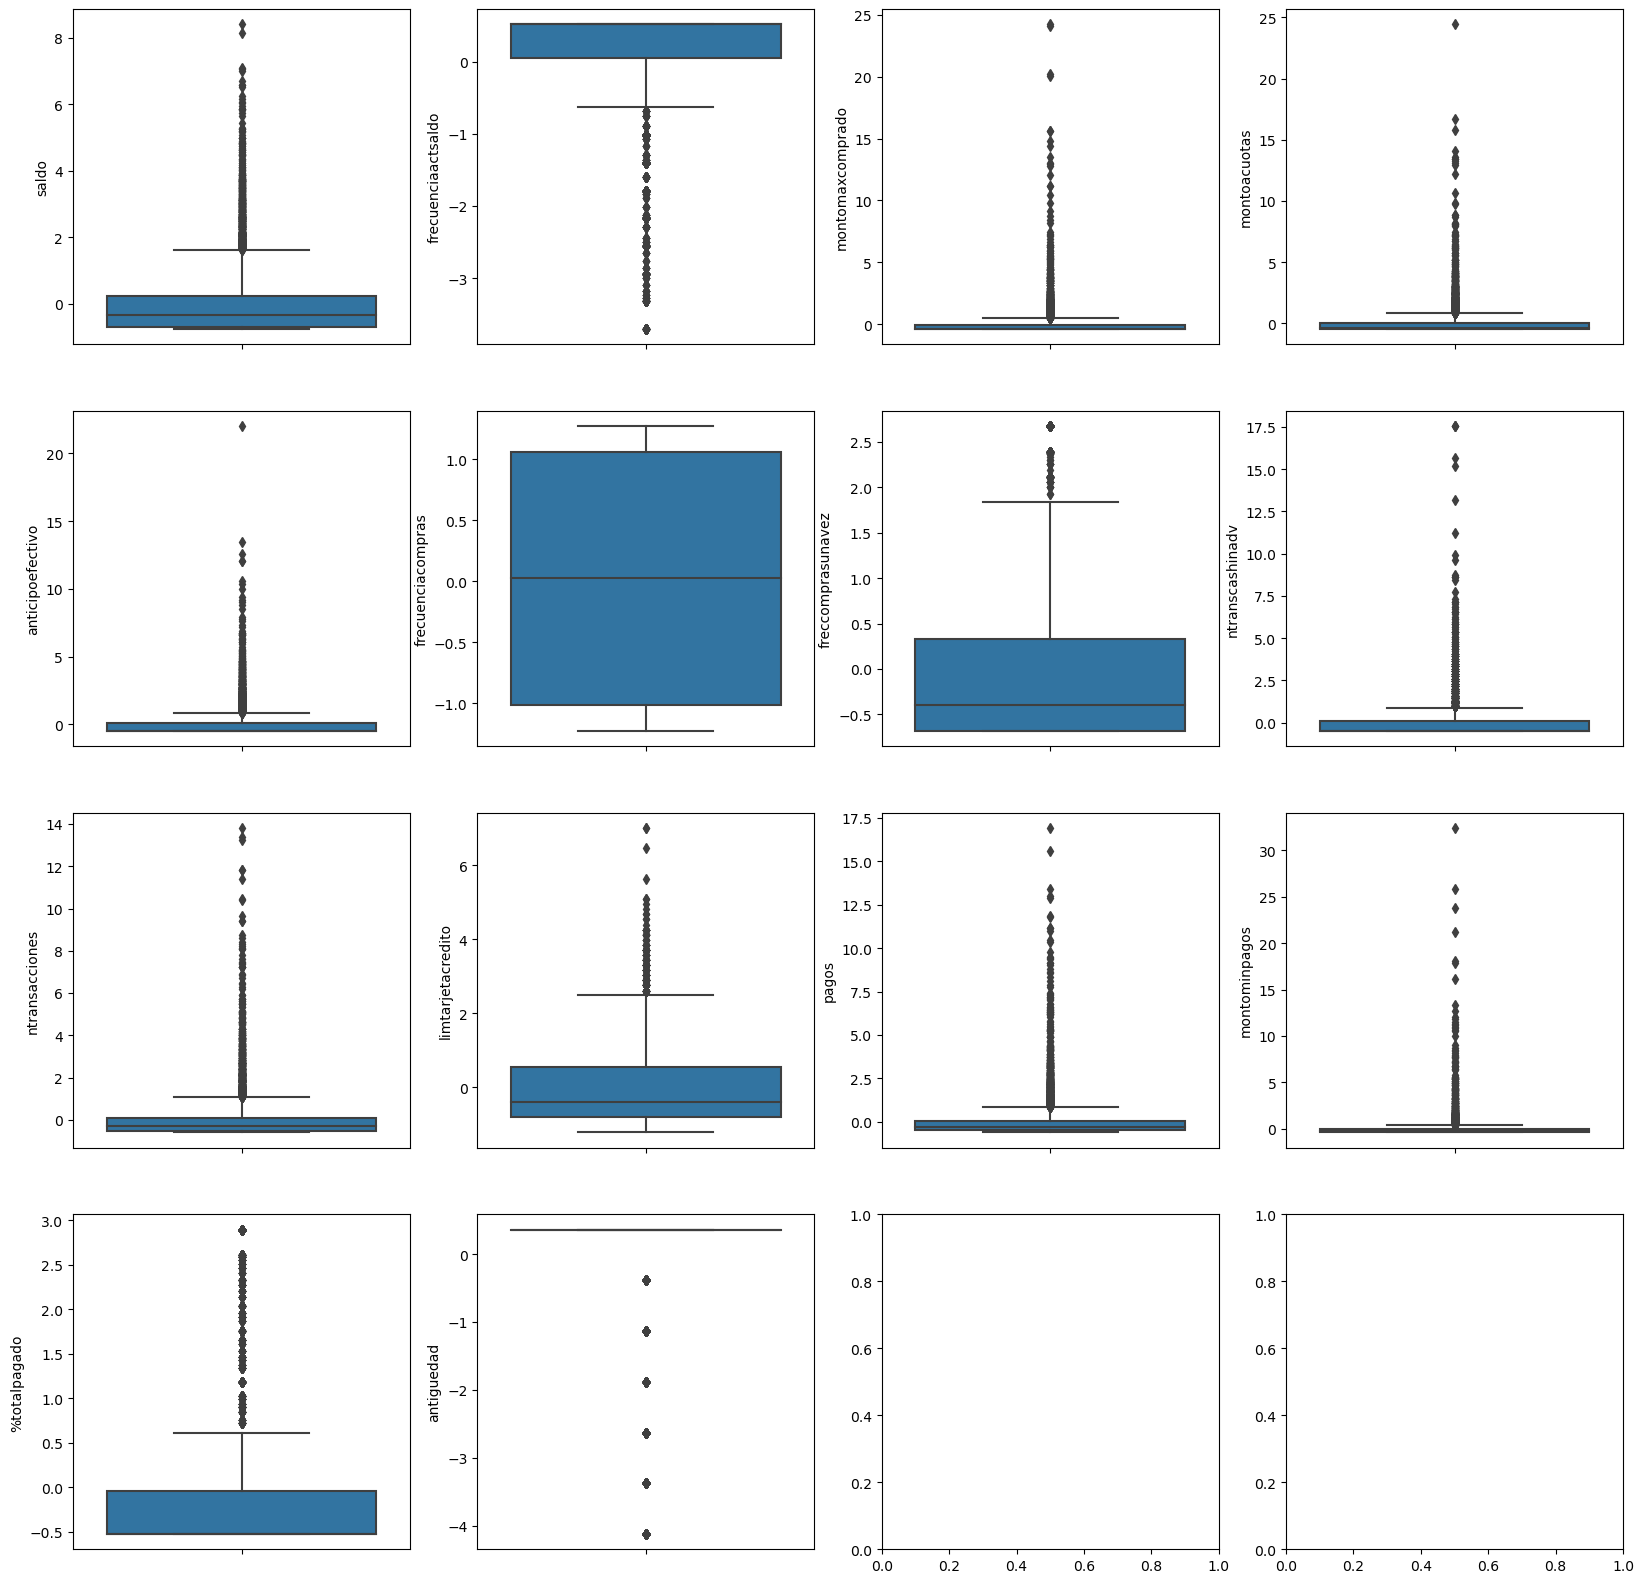

In [201]:
# Tratamiento de valores atípicos
train_tabla = scaled_tabla.copy()

# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=4,figsize=(20,20))

for idx,i in enumerate(train_tabla.columns):
    sns.boxplot(y=train_tabla[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

Imputacion de valores atipicos

In [202]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr): #thr es para eliiminar los valores que esten por fuera del 1.5 veces el rango intercuartilico
    Q1 = np.quantile(df[column], 0.25) # first quartile
    Q3 = np.quantile(df[column], 0.75) # third quartile
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df[df[column] < lower]
    upper_bound = df[df[column] > upper]
    return upper, lower

In [204]:

listupper = []
listlower = []
i=0
listar=[3.5,7.0,4.5,3.5,5.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,7.0,3.5]
for feature_name in train_tabla.columns:
    upper, lower = outlier_IQR(train_tabla, feature_name, thr=listar[i] )
    listupper.append(upper)
    listlower.append(lower)
    i+=1
limites = pd.DataFrame({'Upper_Limit': listupper, 'Lower_Limit': listlower})
limites

# Ahora tienes un DataFrame 'limites' con los límites superior e inferior para cada columna en train_tabla

Upper_Limit  Lower_Limit
0      3.473679    -3.928430
1      3.801357    -3.234228
2      1.556391    -1.922382
3      1.877501    -2.268414
4      2.985611    -3.388044
5      8.329387    -8.281302
6      3.846690    -4.198378
7      2.161577    -2.527573
8      2.345090    -2.804518
9      5.264815    -5.509125
10     1.893154    -2.301415
11     1.041307    -1.338823
12     3.381878    -3.944551
13     0.360680     0.360680

In [205]:
limites.iat[13,0]=10
limites.iat[13,1]=-10

In [206]:
limites

Upper_Limit  Lower_Limit
0      3.473679    -3.928430
1      3.801357    -3.234228
2      1.556391    -1.922382
3      1.877501    -2.268414
4      2.985611    -3.388044
5      8.329387    -8.281302
6      3.846690    -4.198378
7      2.161577    -2.527573
8      2.345090    -2.804518
9      5.264815    -5.509125
10     1.893154    -2.301415
11     1.041307    -1.338823
12     3.381878    -3.944551
13    10.000000   -10.000000

In [207]:
train=train_tabla
tamañoantes = []
tamañodespues = []
i = 0
for feature_name, feature_array in train.items():
    tamañoantes.append(train.shape[0])
    train = train[(train[feature_name] <= limites['Upper_Limit'][i]) & (train[feature_name] >= limites['Lower_Limit'][i])]
    tamañodespues.append(train.shape[0])
    i += 1
valoreseliminados = pd.DataFrame({'tamaño_inicial': tamañoantes, 'tamaño_final': tamañodespues})
valoreseliminados
valoreseliminados.set_index(train.columns,inplace=True)
valoreseliminados["valoreseliminados"]=valoreseliminados["tamaño_inicial"]-valoreseliminados["tamaño_final"]
display(valoreseliminados)
display("filas totales eliminadas", valoreseliminados["valoreseliminados"].sum())


tamaño_inicial  tamaño_final  valoreseliminados
saldo                         8950          8826                124
frecuenciaactsaldo            8826          8666                160
montomaxcomprado              8666          8346                320
montoacuotas                  8346          8124                222
anticipoefectivo              8124          7977                147
frecuenciacompras             7977          7977                  0
freccomprasunavez             7977          7977                  0
ntranscashinadv               7977          7765                212
ntransacciones                7765          7684                 81
limtarjetacredito             7684          7683                  1
pagos                         7683          7589                 94
montominpagos                 7589          7407                182
%totalpagado                  7407          7407                  0
antiguedad                    7407          7407                  0

'filas totales eliminadas'

1543

In [208]:
train.shape

(7407, 14)

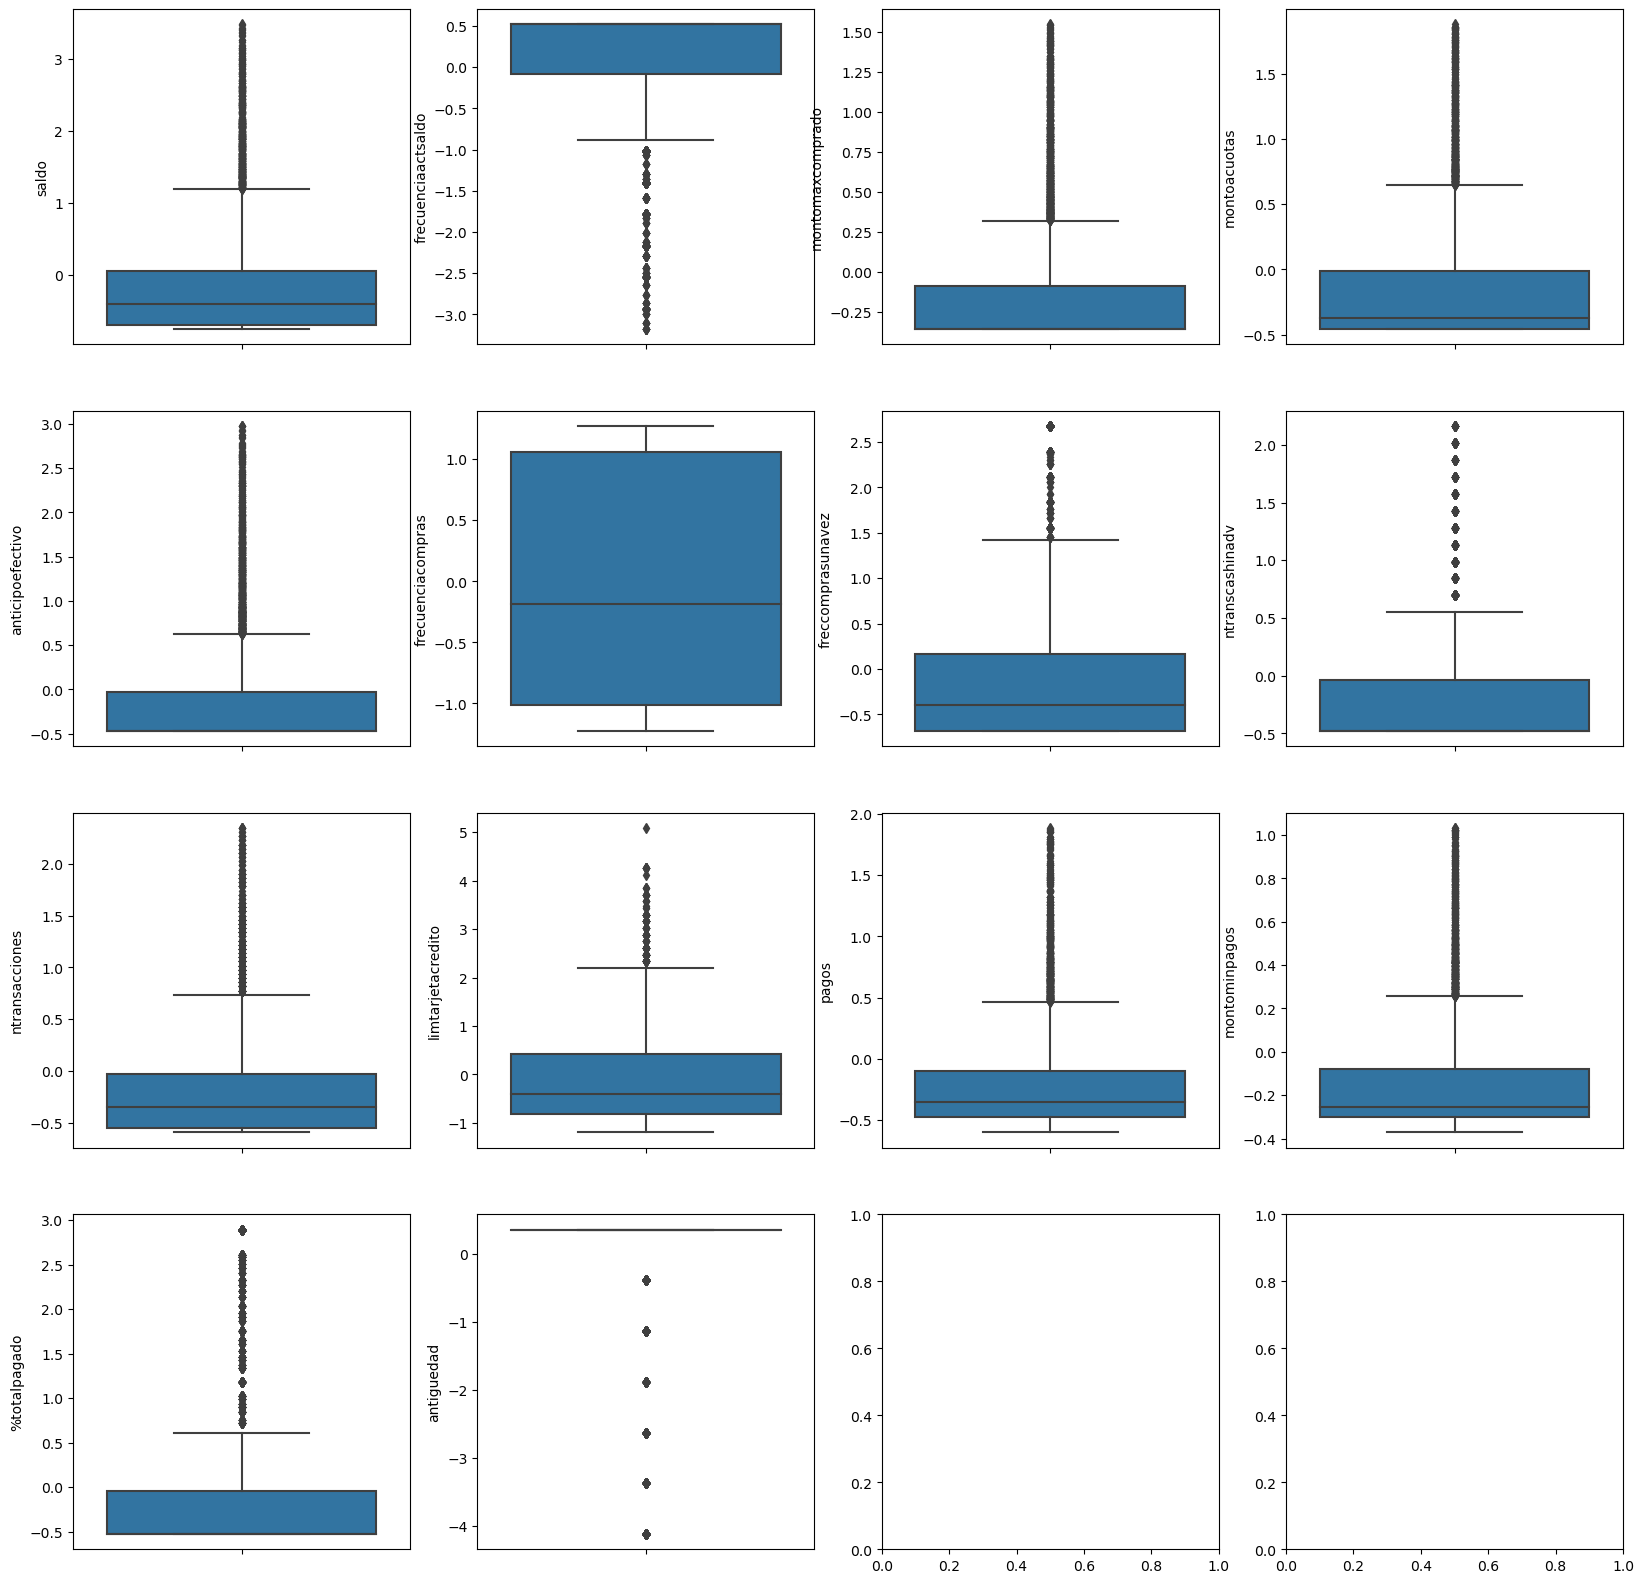

In [209]:
# Sentar las bases de un "mosaico boxplot de 6x4 (para cubrir 22 variables)":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=4,figsize=(20,20))

for idx,i in enumerate(train.columns):
    sns.boxplot(y=train[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

# MODELO 1

Grafico de inercia

In [210]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++' , random_state=3)
    kmeans.fit(train)
    inertia_list.append(kmeans.inertia_)

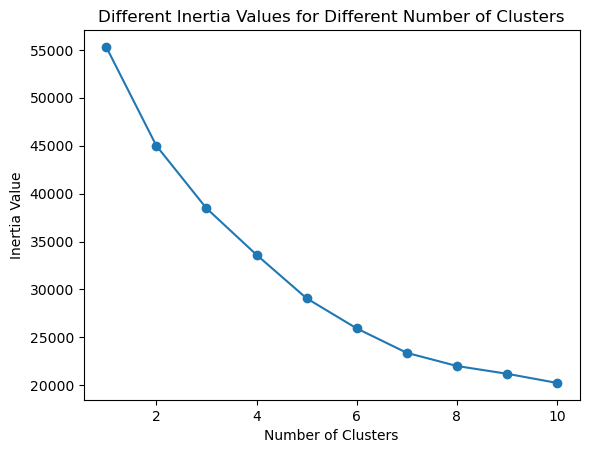

In [211]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

El codo puede estar en 4, sin embargo se analizan otros graficos

 Metodo del codo

In [212]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": 'random', "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


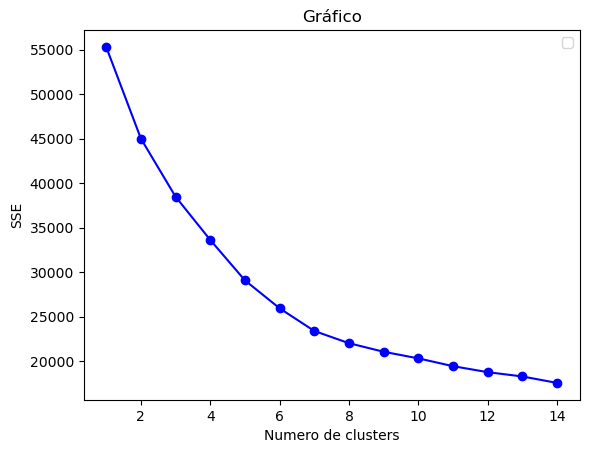

In [213]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

 Coeficiente de silueta

In [214]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train)
  score = silhouette_score(train, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


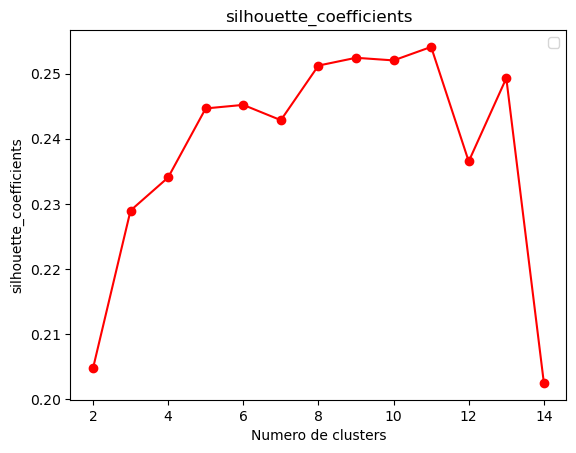

In [215]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [217]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

6

Modelo

In [218]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=6,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
# metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train, kmeans.labels_))

[[ 1.31706913e+00  4.39941370e-01 -2.19408070e-01 -2.86554753e-01
   8.23146626e-01 -5.67455729e-01 -3.53632033e-01  5.57394020e-01
  -3.57264461e-01  8.54286770e-01  1.01714157e-01  2.08799923e-01
  -4.83162016e-01  1.98683648e-01]
 [-1.64682063e-01  4.07591972e-01 -2.52936368e-01 -3.96887836e-01
  -1.79328911e-01 -8.38841015e-01 -4.15443371e-01 -6.82871362e-02
  -4.81558920e-01 -4.74975027e-01 -3.06270069e-01 -1.54853321e-01
  -4.61715323e-01  2.75950932e-01]
 [-1.53172315e-01  4.17730628e-01  4.12704533e-01  5.39924723e-02
  -3.33762851e-01  9.87600506e-01  1.81987608e+00 -3.17461339e-01
   5.43481497e-01  3.49761238e-01 -5.08283975e-04 -1.65033663e-01
   3.05002037e-01  2.72935314e-01]
 [-3.68117960e-01 -3.52854460e-01 -2.29284248e-01 -2.71925888e-01
   1.69966256e-02 -1.66005462e-01 -2.98053533e-01 -2.67873916e-02
  -3.82476435e-01 -5.86398214e-01 -4.09639964e-01 -2.26594895e-01
   3.23672043e-02 -3.18179719e+00]
 [-4.78935951e-01  3.40522817e-01 -2.53738053e-01  2.50633150e-01
  

In [219]:
#Predecir valores de etiquetas
tablafinal=train.copy()
cluster_1 = kmeans.fit_predict(train)
tablafinal["cluster_1"]=cluster_1


Comprobacion

In [220]:
tablafinal["cluster_1"].value_counts()

1    2292
4    1621
2    1056
5    1019
0     798
3     621
Name: cluster_1, dtype: int64

# Reduccion de la dimensionalidad

In [221]:
pca = PCA(n_components=0.80).fit(train)
pca.n_components_

5

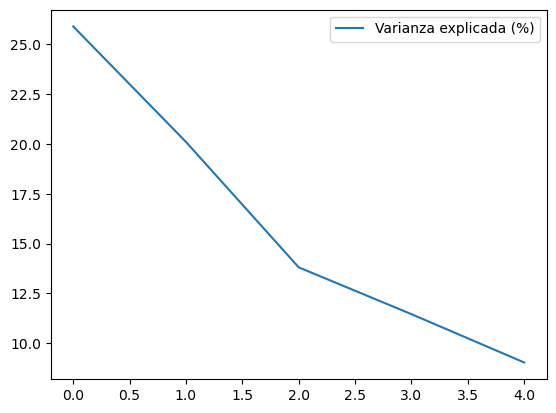

In [225]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC' + str(i) for i in range(1, 5)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)"""

plt.show()


In [226]:
PCA_variance

Varianza explicada (%)
0               25.889381
1               20.098018
2               13.807845
3               11.459713
4                9.036338

Transformacion

In [227]:
train_pca=pca.fit_transform(train)

In [228]:
import warnings
# Suprimir las advertencias relacionadas con K-Means
warnings.filterwarnings("ignore", category=FutureWarning)

Grafico de inercia

In [229]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(train_pca)
    inertia_list.append(kmeans.inertia_)

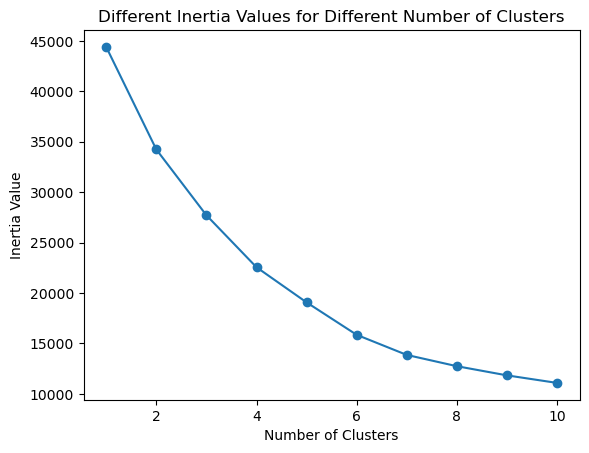

In [230]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

Metodo del codo

In [231]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


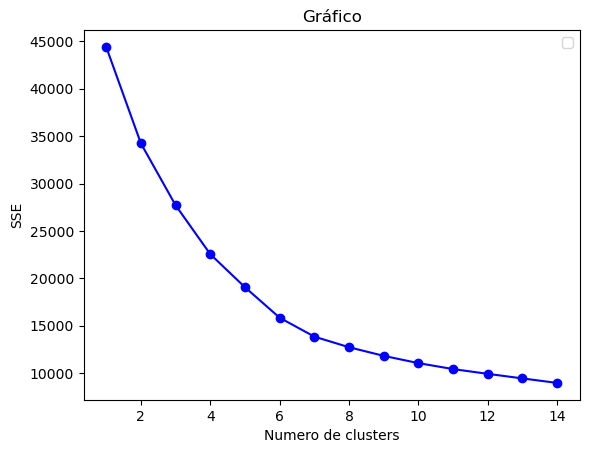

In [74]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

In [232]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca)
  score = silhouette_score(train_pca, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


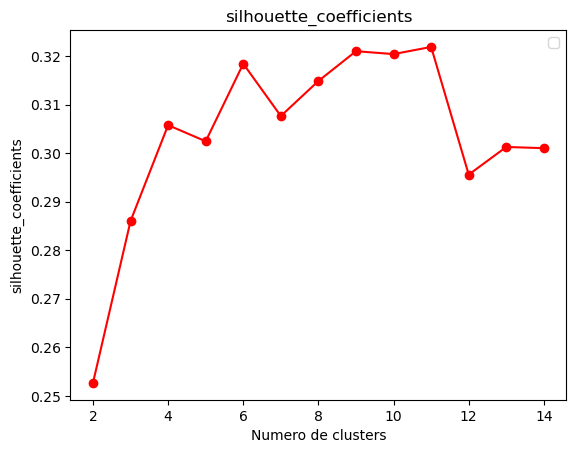

In [233]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [234]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

6

In [235]:
#Modelo kmeans
kmeans = KMeans(init='k-means++',
                n_clusters=6,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

[[-0.47071035 -0.1962208  -0.3288105  -0.69956255 -0.07519003]
 [ 1.77761229 -0.86164291  0.34167176 -0.08847839  0.75057687]
 [-0.91424756  1.55930206  2.68120663  0.07742415 -0.00974931]
 [ 1.80042086  1.11723783 -0.45097582  0.43316302 -1.08851697]
 [-1.02749319 -1.59726904  0.15175144  0.78939538 -0.55410158]
 [-0.74715622  1.29297655 -0.94286337  0.84231924  0.87189235]]
Numero de iteraciones:  43
Inertia:  15849.002684325307
Silhouette Score:  0.3184144844423912
Calinski harabasz score:  2666.6633622489344


In [236]:
#Predecir valores de etiquetas
cluster_2 = kmeans.fit_predict(train_pca)
tablafinal["cluster_2"]=cluster_2

In [237]:
tablafinal["cluster_2"].value_counts()

0    2769
1    1170
4    1019
5     966
3     865
2     618
Name: cluster_2, dtype: int64

### PCA solo 3 factores

In [238]:
pca = PCA(n_components=3).fit(train)
pca.n_components_

3

"bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],\n                  y = PCA_variance['Varianza explicada (%)'],\n                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',\n                  alpha = 0.8)\n\nplt.show()"

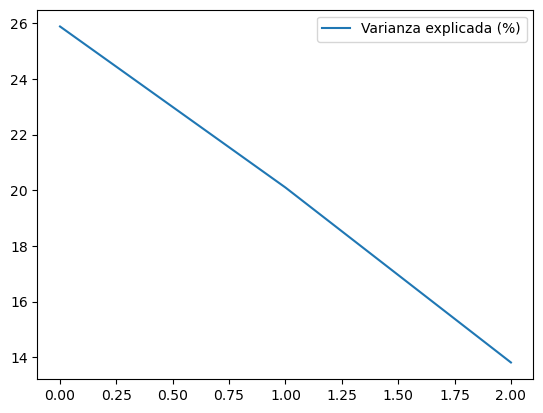

In [239]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})
PCA_variance.plot()
#fig, ax = plt.subplots(1, 1, figsize = (7, 5))

"""bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 12)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()"""

In [160]:
PCA_variance

Varianza explicada (%)
0               25.889381
1               20.098018
2               13.807845

In [240]:
train_pca1=pca.fit_transform(train)

## kmeans PCA 3 componentes con 4 cluster

## Grafico de inercia

In [241]:
# Número optimo de K
inertia_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(train_pca1)
    inertia_list.append(kmeans.inertia_)

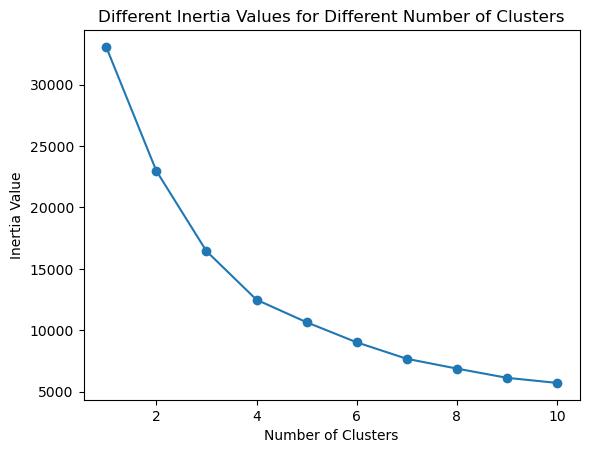

In [242]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

4 cluster

## Grafico 

In [243]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca1)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


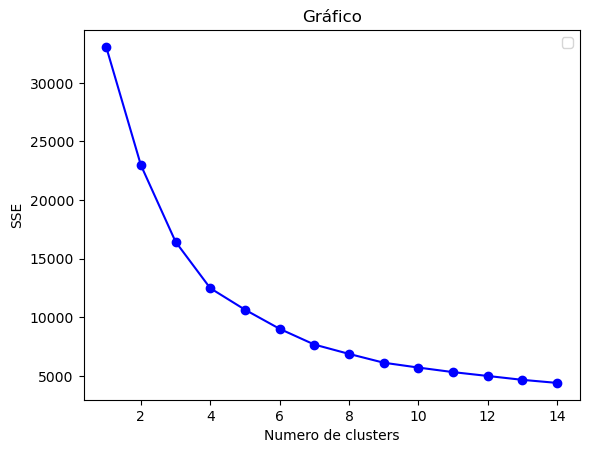

In [244]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

In [245]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_pca1)
  score = silhouette_score(train_pca1, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


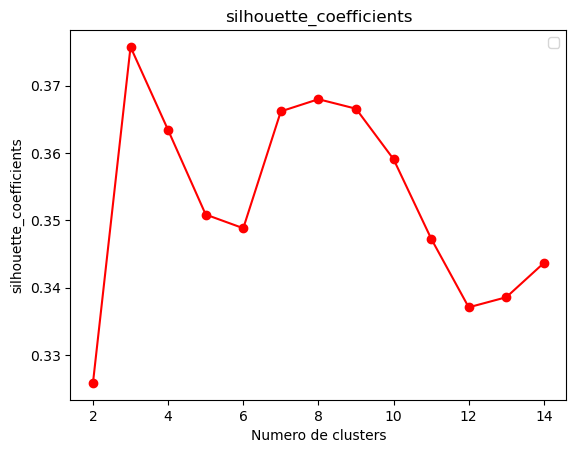

In [246]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

In [247]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

4

In [253]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca1)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca1, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, kmeans.labels_))

[[ 1.6636     -0.5021876   0.13116186]
 [-0.9422923  -0.68235404 -0.2206805 ]
 [ 0.06080258  1.2367253  -0.78165015]
 [-0.86279766  1.55103089  2.61904848]]
Numero de iteraciones:  36
Inertia:  12482.642975738572
Silhouette Score:  0.36340099165703105
Calinski harabasz score:  4069.3594598308946


In [254]:
#Predecir valores de etiquetas
cluster_3 = kmeans.fit_predict(train_pca1)
tablafinal["cluster_3"]=cluster_3

In [255]:
tablafinal["cluster_3"].unique()

array([2, 1, 0, 3])

In [256]:
tablafinal

saldo  frecuenciaactsaldo  montomaxcomprado  montoacuotas  \
0    -0.731989           -0.249434         -0.356934     -0.349079   
1     0.786961            0.134325         -0.356934     -0.454576   
2     0.447135            0.518084          0.108889     -0.454576   
3     0.049099           -1.016953          0.546189     -0.454576   
4    -0.358775            0.518084         -0.347294     -0.454576   
...        ...                 ...               ...           ...   
8945 -0.737950            0.518084         -0.356934     -0.132643   
8946 -0.742423            0.518084         -0.356934     -0.122823   
8947 -0.740398           -0.185477         -0.356934     -0.294893   
8948 -0.745174           -0.185477         -0.356934     -0.454576   
8949 -0.572575           -0.889033          0.301732     -0.454576   

      anticipoefectivo  frecuenciacompras  freccomprasunavez  ntranscashinadv  \
0            -0.466786          -0.806490          -0.678661        -0.476070   
1             2.605605          -1.221758          -0.678661         0.110074   
2            -0.466786           1.269843           2.673451        -0.476070   
3            -0.368653          -1.014125          -0.399319        -0.329534   
4            -0.466786          -1.014125          -0.399319        -0.476070   
...                ...                ...                ...              ...   
8945         -0.466786           1.269843          -0.678661        -0.476070   
8946         -0.466786           1.269843          -0.678661        -0.476070   
8947         -0.466786           0.854576          -0.678661        -0.476070   
8948         -0.449352          -1.221758          -0.678661        -0.182998   
8949         -0.406205           0.439310           1.556082        -0.182998   

      ntransacciones  limtarjetacredito     pagos  montominpagos  \
0          -0.511333          -0.960433 -0.528979  -3.109675e-01   
1          -0.591796           0.688639  0.818642   8.931021e-02   
2          -0.109020           0.826062 -0.383805  -1.016632e-01   
3          -0.551565           0.826062 -0.598688   4.878305e-17   
4          -0.551565          -0.905464 -0.364368  -2.657913e-01   
...              ...                ...       ...            ...   
8945       -0.350408          -0.960433 -0.486217  -3.498541e-01   
8946       -0.350408          -0.960433 -0.503396   4.878305e-17   
8947       -0.390639          -0.960433 -0.570615  -3.354655e-01   
8948       -0.591796          -1.097856 -0.580536  -3.469065e-01   
8949        0.333524          -0.905464 -0.576869  -3.329464e-01   

      %totalpagado  antiguedad  cluster_1  cluster_2  cluster_3  
0        -0.525551    0.360680          1          0          2  
1         0.234227    0.360680          0          4          1  
2        -0.525551    0.360680          2          1          0  
3        -0.525551    0.360680          5          5          1  
4        -0.525551    0.360680          1          0          1  
...            ...         ...        ...        ...        ...  
8945      1.183951   -4.122768          3          2          3  
8946     -0.525551   -4.122768          3          2          3  
8947      0.329200   -4.122768          3          2          3  
8948      0.329200   -4.122768          3          2          3  
8949     -0.525551   -4.122768          3          2          3  

[7407 rows x 17 columns]

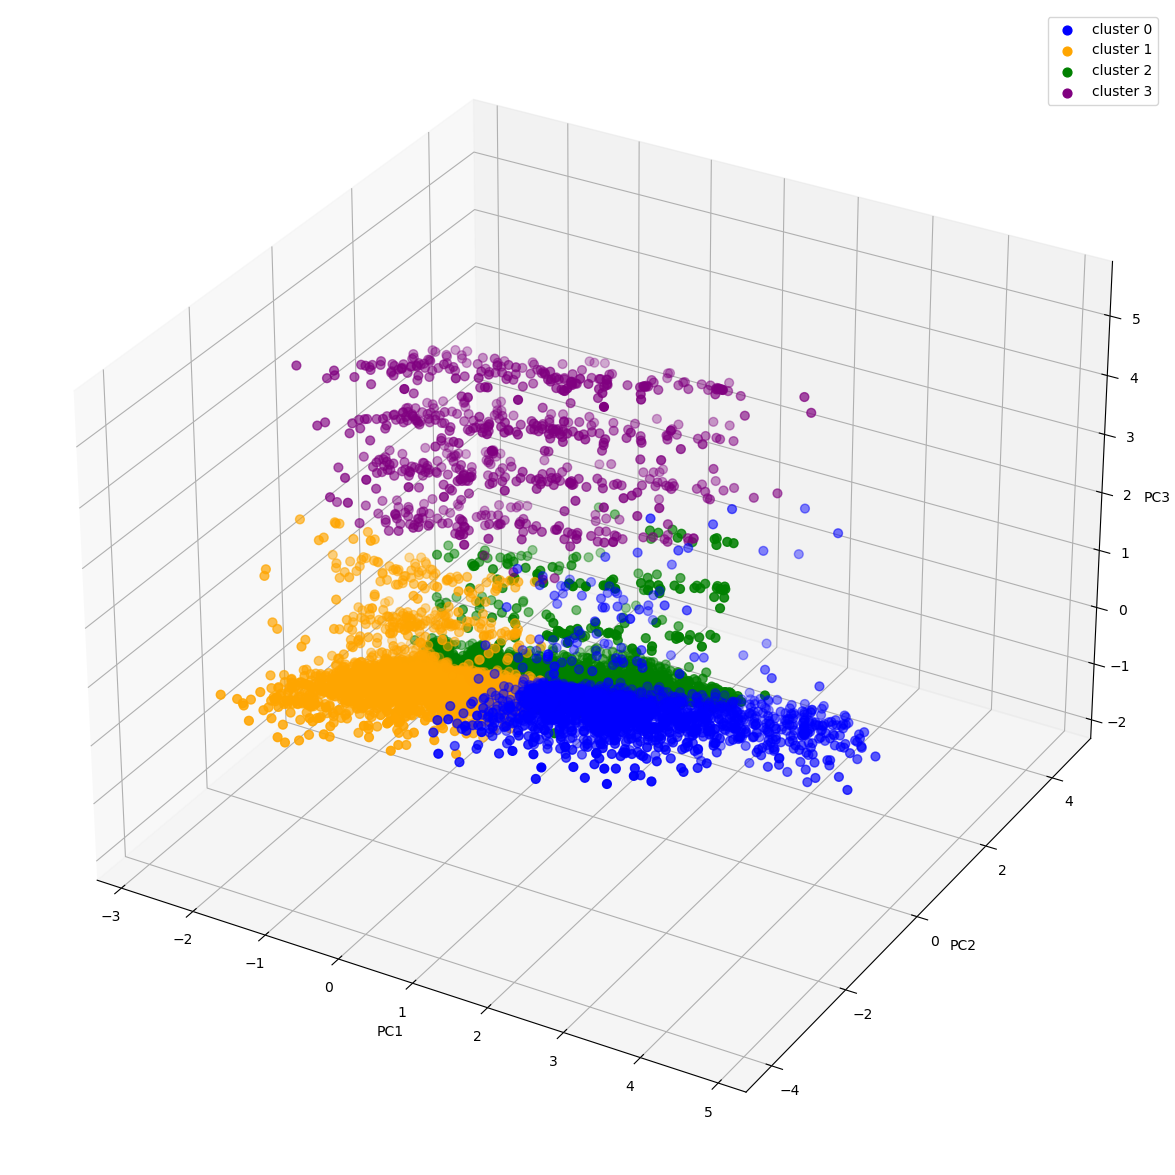

In [257]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_3 == 0,0],train_pca1[cluster_3== 0,1],train_pca1[cluster_3== 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_3 == 1,0],train_pca1[cluster_3== 1,1],train_pca1[cluster_3== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_3== 2,0],train_pca1[cluster_3== 2,1],train_pca1[cluster_3== 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_3== 3,0],train_pca1[cluster_3== 3,1],train_pca1[cluster_3== 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

## Kmeans PCA 3 componentes con 5 cluster

In [175]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=5,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(train_pca)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)
#Metricas
print('Inertia: ', kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(train_pca, kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, kmeans.labels_))

[[-1.00907841 -0.77529224 -0.19530991 -0.05718096 -0.25659641]
 [ 2.15987658 -0.81594958  0.35798134  0.29443493  0.65423718]
 [-0.873086    1.54710094  2.66272192  0.10139279 -0.03896444]
 [-0.60775952  1.33303571 -0.9444622   0.87365866  0.7364124 ]
 [ 0.83587917  0.32325454 -0.29644311 -0.63599817 -0.43155613]]
Numero de iteraciones:  16
Inertia:  19065.128114900064
Silhouette Score:  0.30203500592392796
Calinski harabasz score:  2459.238641794804


In [176]:
#Predecir valores de etiquetas
cluster_4 = kmeans.fit_predict(train_pca1)
tablafinal["cluster_4"]=cluster_4

In [177]:
tablafinal["cluster_4"].unique()

array([2, 3, 0, 1, 4])

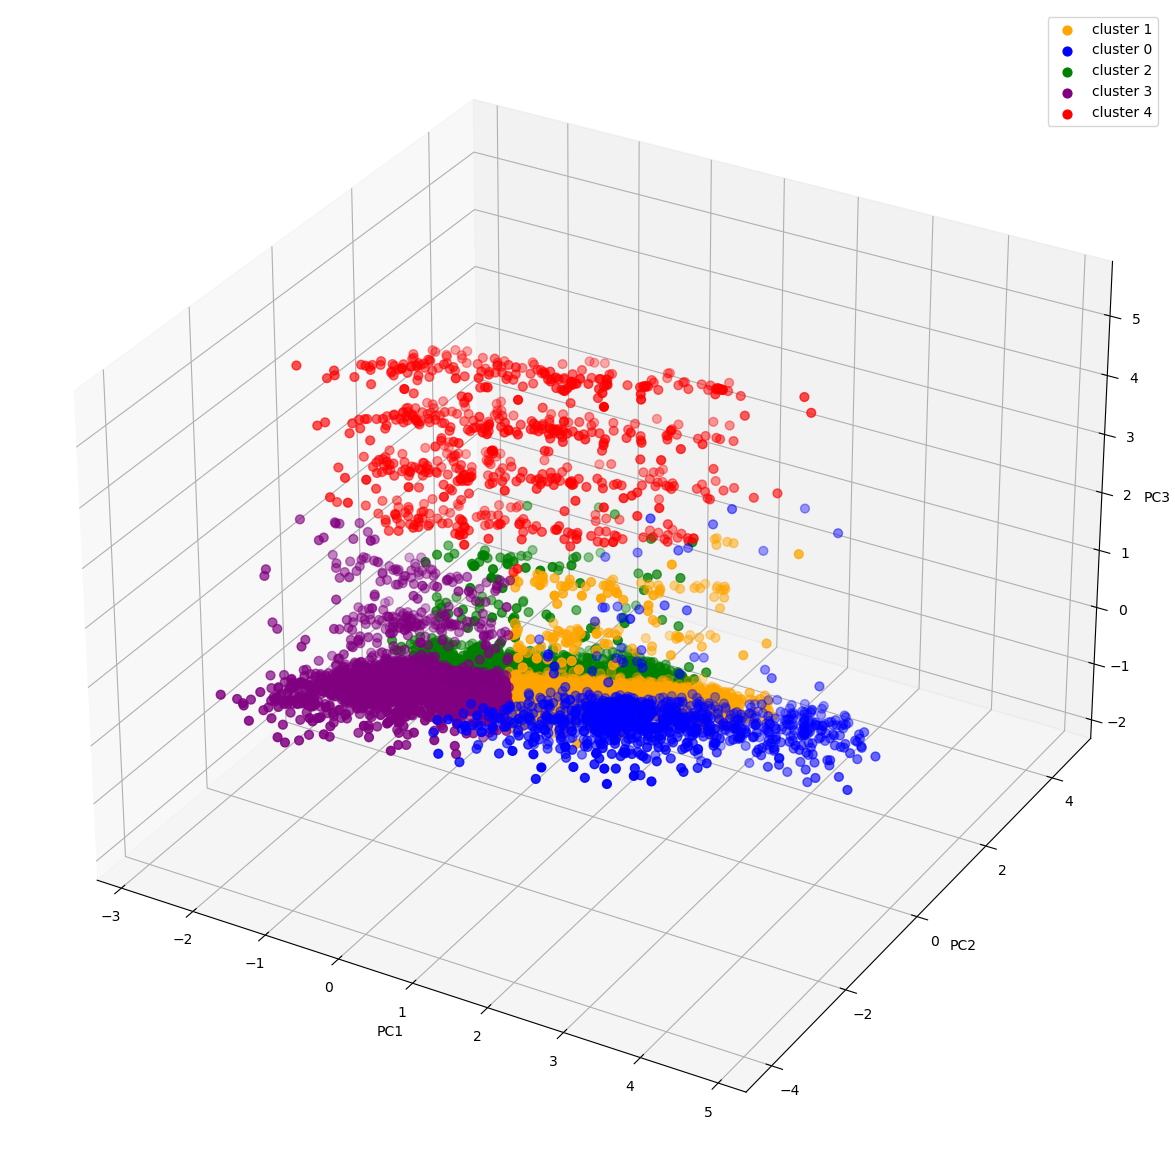

In [180]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_4 == 1,0],train_pca1[cluster_4 == 1,1],train_pca1[cluster_4== 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_4 == 0,0],train_pca1[cluster_4 == 0,1],train_pca1[cluster_4 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_4 == 2,0],train_pca1[cluster_4 == 2,1],train_pca1[cluster_4 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_4 == 3,0],train_pca1[cluster_4 == 3,1],train_pca1[cluster_4 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
ax.scatter(train_pca1[cluster_4 == 4,0],train_pca1[cluster_4 == 4,1],train_pca1[cluster_4 == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

# Algoritmo de DBSCAN

In [434]:
from sklearn.neighbors import NearestNeighbors

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 28) #no cambia si se pone 2 o 34, se puede dejar cualquiera
neighbors.fit(train_pca1)

distances, *other = neighbors.kneighbors(train_pca1)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(7407,)


array([6.49734942e-04, 6.49734942e-04, 8.15918168e-04, ...,
       9.88041240e-01, 1.28925162e+00, 1.32749415e+00])

C:\Users\Luisa\AppData\Local\Temp\ipykernel_9732\1471989755.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


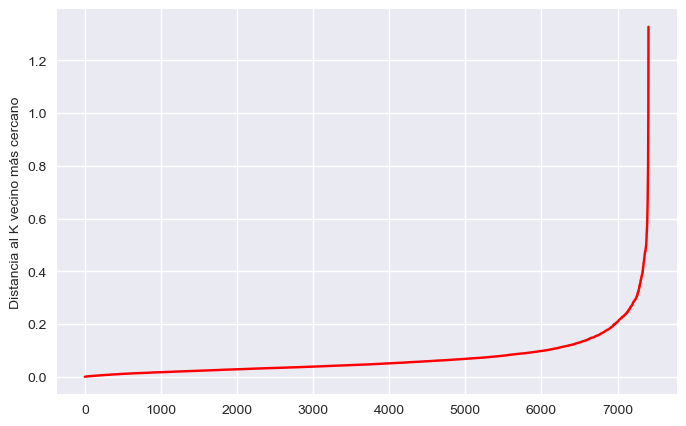

In [435]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [436]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

7330

In [437]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]     #indice 
epsilon

0.39965088099860313

este algoritmo es muy sensible a estos parametros, estos datos son solo una referencia, se puede seguir buscando para encontrar mejores agrupaciones,
si se varia se puede sacar mas grupos, probar mas valores, prueba y error

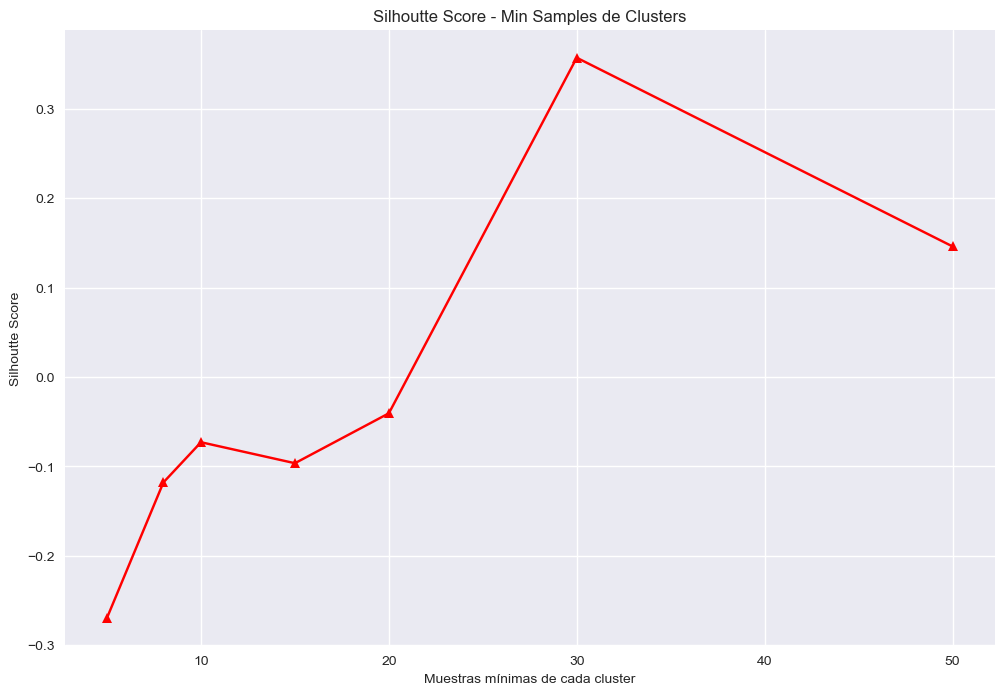

In [438]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [5, 8, 10, 15, 20, 30, 50]: #puntos minimos que se estan probando
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)   #otra forma de encontrar este parametro
    model_d.fit(train_pca1)
    silhoutte_coefs.append(silhouette_score(train_pca1, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([5, 8, 10, 15, 20, 30, 50], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [447]:
# --- Modelo DBSCAN ---
model_db_pca = DBSCAN(eps = epsilon, min_samples = 30, n_jobs=-1)
model_db_pca.fit(train_pca1)

DBSCAN(eps=0.39965088099860313, min_samples=30, n_jobs=-1)

In [448]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, model_db_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, model_db_pca.labels_))

 ### DBSCAN ###


Silhouette Score:  0.3571467038515936
Calinski harabasz score:  1603.4173888889325


metrica de calinski muy bajita ya que tenemos un solo cluster

In [449]:
##Predecir valores de etiquetas
cluster_5 = model_db_pca.fit_predict(train_pca1)
tablafinal["cluster_5"]=cluster_5

In [452]:
tablafinal["cluster_5"].value_counts()

 0    6177
-1    1230
Name: cluster_5, dtype: int64

In [451]:
tablafinal

saldo  frecuenciaactsaldo  montomaxcomprado  montoacuotas  \
0    -0.731989           -0.249434         -0.356934     -0.349079   
1     0.786961            0.134325         -0.356934     -0.454576   
2     0.447135            0.518084          0.108889     -0.454576   
3     0.049099           -1.016953          0.546189     -0.454576   
4    -0.358775            0.518084         -0.347294     -0.454576   
...        ...                 ...               ...           ...   
8945 -0.737950            0.518084         -0.356934     -0.132643   
8946 -0.742423            0.518084         -0.356934     -0.122823   
8947 -0.740398           -0.185477         -0.356934     -0.294893   
8948 -0.745174           -0.185477         -0.356934     -0.454576   
8949 -0.572575           -0.889033          0.301732     -0.454576   

      anticipoefectivo  frecuenciacompras  freccomprasunavez  ntranscashinadv  \
0            -0.466786          -0.806490          -0.678661        -0.476070   
1             2.605605          -1.221758          -0.678661         0.110074   
2            -0.466786           1.269843           2.673451        -0.476070   
3            -0.368653          -1.014125          -0.399319        -0.329534   
4            -0.466786          -1.014125          -0.399319        -0.476070   
...                ...                ...                ...              ...   
8945         -0.466786           1.269843          -0.678661        -0.476070   
8946         -0.466786           1.269843          -0.678661        -0.476070   
8947         -0.466786           0.854576          -0.678661        -0.476070   
8948         -0.449352          -1.221758          -0.678661        -0.182998   
8949         -0.406205           0.439310           1.556082        -0.182998   

      ntransacciones  limtarjetacredito     pagos  montominpagos  \
0          -0.511333          -0.960433 -0.528979  -3.109675e-01   
1          -0.591796           0.688639  0.818642   8.931021e-02   
2          -0.109020           0.826062 -0.383805  -1.016632e-01   
3          -0.551565           0.826062 -0.598688   4.878305e-17   
4          -0.551565          -0.905464 -0.364368  -2.657913e-01   
...              ...                ...       ...            ...   
8945       -0.350408          -0.960433 -0.486217  -3.498541e-01   
8946       -0.350408          -0.960433 -0.503396   4.878305e-17   
8947       -0.390639          -0.960433 -0.570615  -3.354655e-01   
8948       -0.591796          -1.097856 -0.580536  -3.469065e-01   
8949        0.333524          -0.905464 -0.576869  -3.329464e-01   

      %totalpagado  antiguedad  cluster  cluster_1  cluster_2  cluster_3  \
0        -0.525551    0.360680        2          4          3          2   
1         0.234227    0.360680        1          4          1          1   
2        -0.525551    0.360680        0          3          0          0   
3        -0.525551    0.360680        1          4          3          1   
4        -0.525551    0.360680        1          4          1          1   
...            ...         ...      ...        ...        ...        ...   
8945      1.183951   -4.122768        3          0          2          3   
8946     -0.525551   -4.122768        3          0          2          3   
8947      0.329200   -4.122768        3          0          2          3   
8948      0.329200   -4.122768        3          0          2          3   
8949     -0.525551   -4.122768        3          0          2          3   

      cluster_4  cluster_5  
0             4          0  
1             1          0  
2             3          0  
3             1          0  
4             1          0  
...         ...        ...  
8945          0         -1  
8946          0         -1  
8947          0         -1  
8948          0         -1  
8949          0         -1  

[7407 rows x 20 columns]

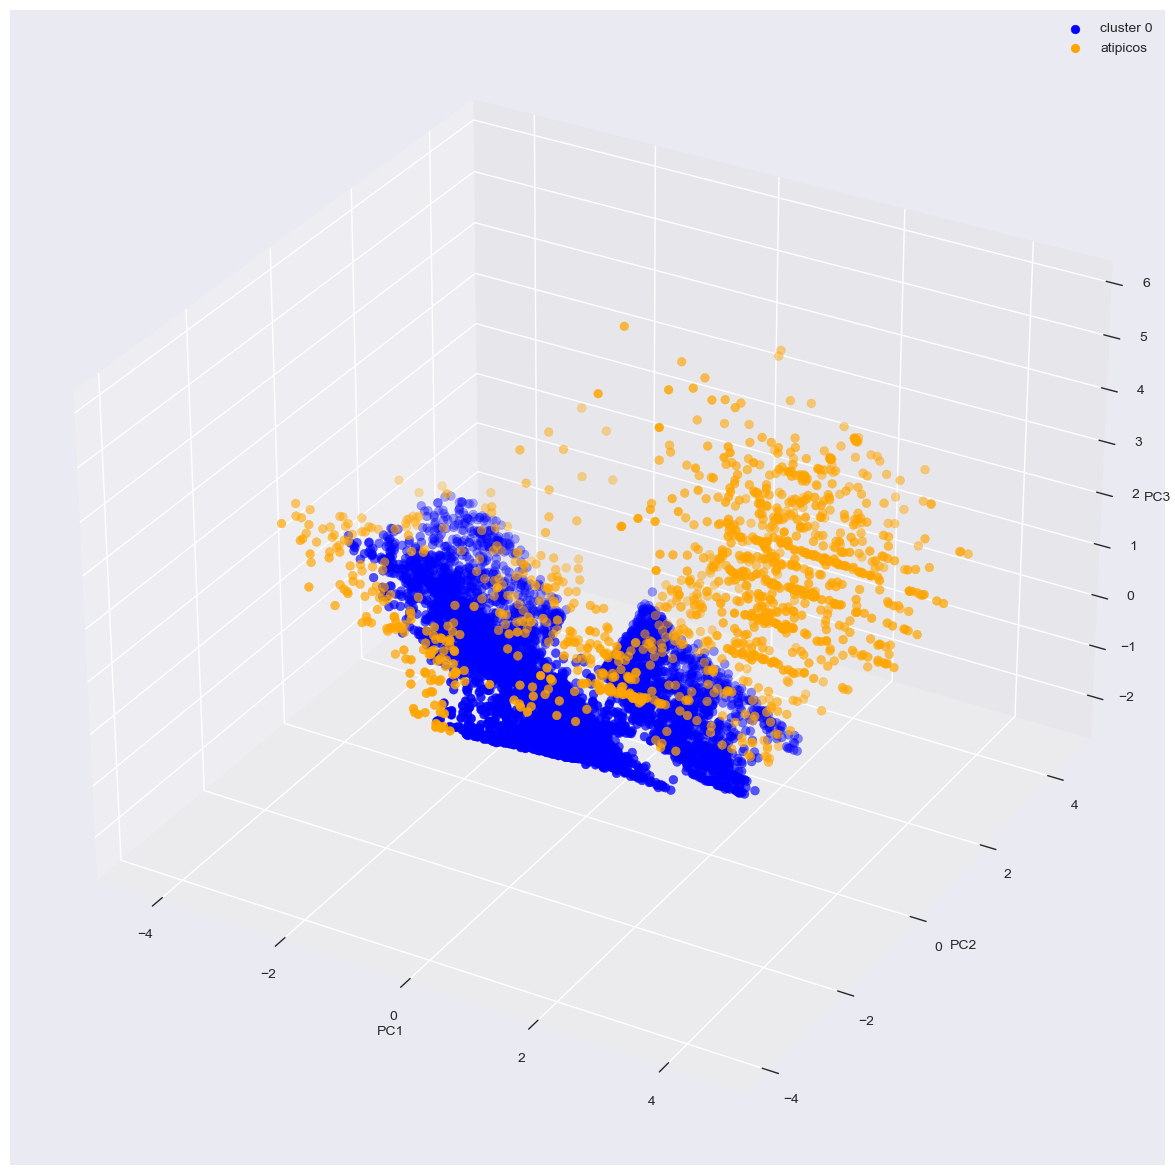

In [454]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_5 == 0,0],train_pca1[cluster_5 == 0,1],train_pca1[cluster_5 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_5 == -1,0],train_pca1[cluster_5 == -1,1],train_pca1[cluster_5 == -1,2], s = 40 , color = 'orange', label = "atipicos")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


No es viable

# Algoritmo de mezclas gaussianas

## PCA 80%

Text(0.5, 0, 'Número de Clusters')

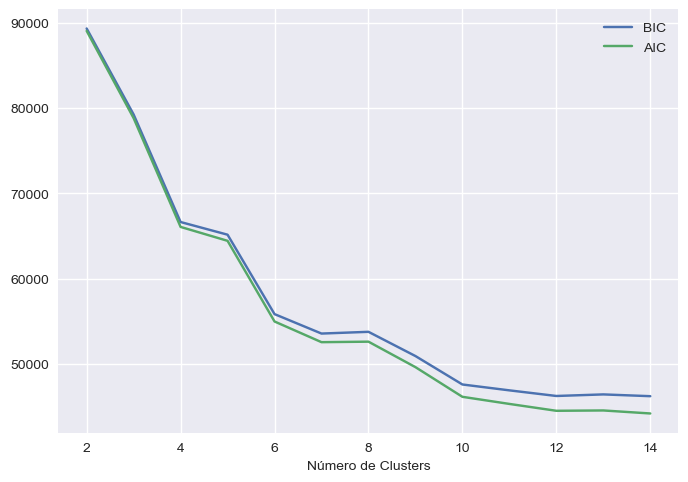

In [464]:
# --- Estimación de hiperparámetros ---

n_components = np.arange(2, 15)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(train_pca) for n in n_components]

plt.plot(n_components, [m.bic(train_pca) for m in models_g], label="BIC")
plt.plot(n_components, [m.aic(train_pca) for m in models_g], label="AIC")
plt.legend()
plt.xlabel("Número de Clusters")

In [465]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'full').fit(train_pca) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

In [467]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca, labels_))

 ### DBSCAN ###
Silhouette Score:  0.22469406268492026
Calinski harabasz score:  1615.5590256817954


In [468]:
##Predecir valores de etiquetas
cluster_7 = model_gmm_pca.fit_predict(train_pca)
tablafinal["cluster_7"]=cluster_7

In [469]:
tablafinal["cluster_7"].value_counts()

1    2456
3    1883
0    1745
2    1323
Name: cluster_7, dtype: int64

## PCA 3 COMPONENTES

Text(0.5, 0, 'Número de Clusters')

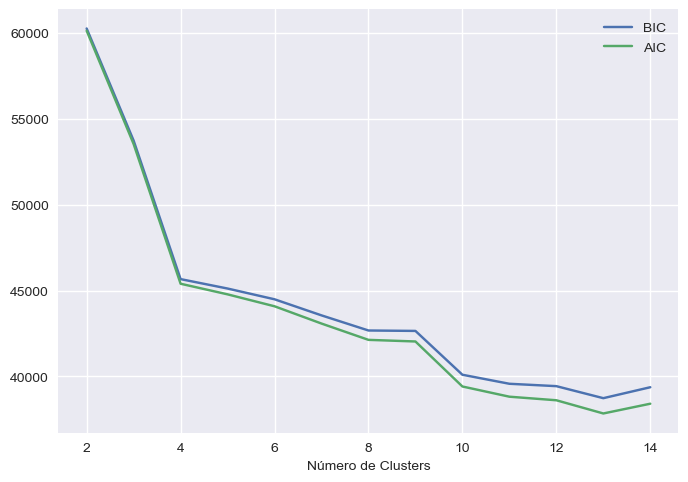

In [456]:
# --- Estimación de hiperparámetros ---

n_components = np.arange(2, 15)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(train_pca1) for n in n_components]

plt.plot(n_components, [m.bic(train_pca1) for m in models_g], label="BIC")
plt.plot(n_components, [m.aic(train_pca1) for m in models_g], label="AIC")
plt.legend()
plt.xlabel("Número de Clusters")

In [458]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'full').fit(train_pca1) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

In [459]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.35974189269671347
Calinski harabasz score:  3303.3247123513925


In [460]:
##Predecir valores de etiquetas
cluster_6 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_6"]=cluster_6

In [462]:
tablafinal["cluster_6"].value_counts()

2    2687
0    1882
1    1479
3    1359
Name: cluster_6, dtype: int64

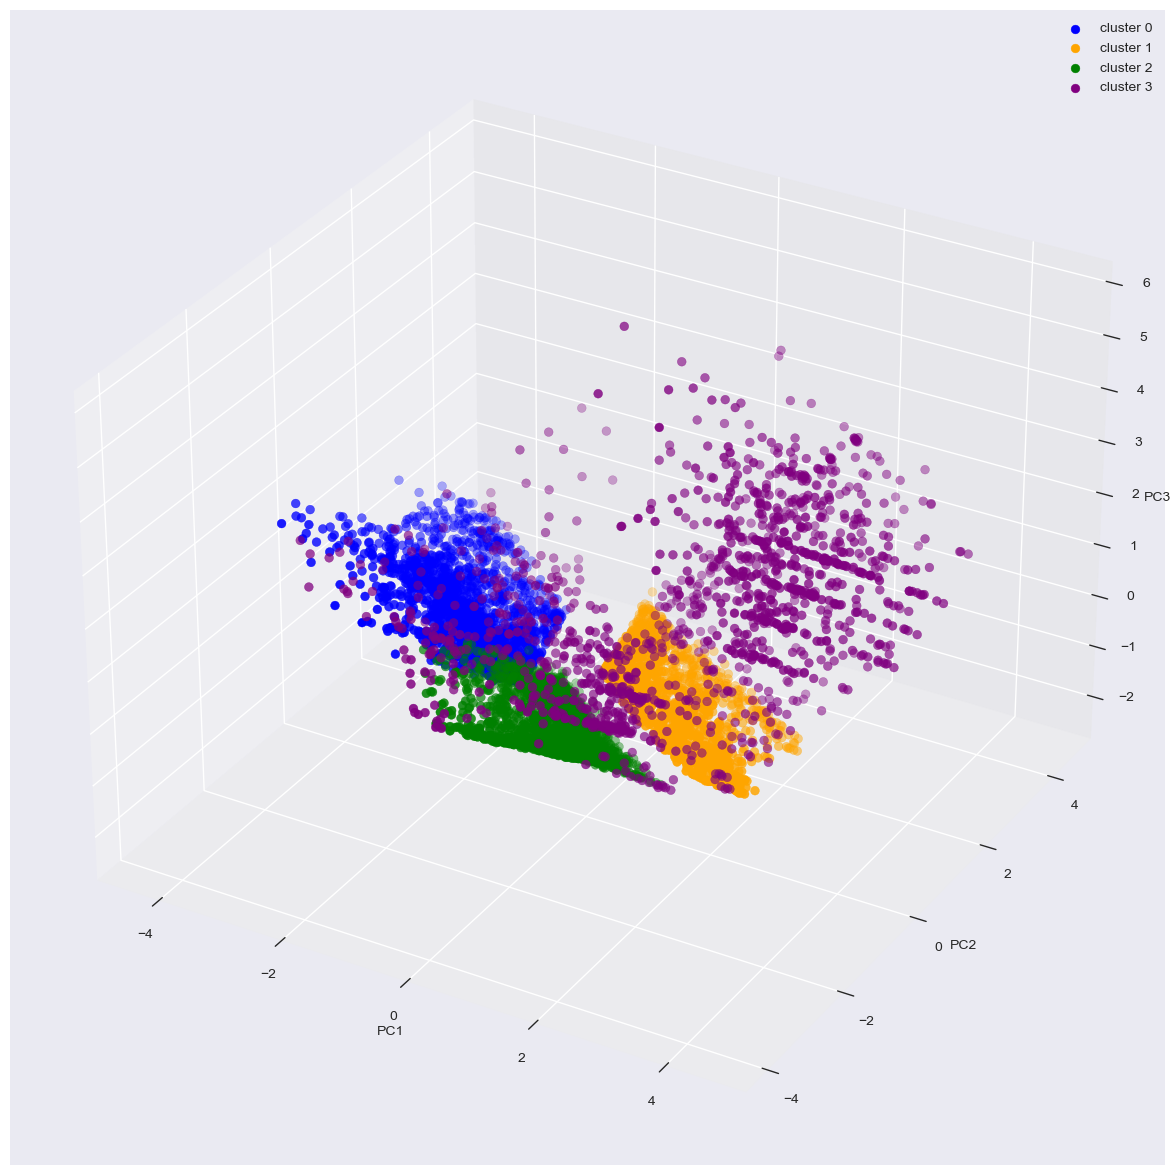

In [463]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_6 == 0,0],train_pca1[cluster_6 == 0,1],train_pca1[cluster_6 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_6 == 1,0],train_pca1[cluster_6 == 1,1],train_pca1[cluster_6 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_6 == 2,0],train_pca1[cluster_6 == 2,1],train_pca1[cluster_6 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_6 == 3,0],train_pca1[cluster_6 == 3,1],train_pca1[cluster_6 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
#ax.scatter(train_pca1[cluster_5 == 4,0],train_pca1[cluster_5 == 4,1],train_pca1[cluster_5 == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Modelo con 'tied': Todos los componentes comparten una única matriz de covarianza completa.

In [470]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'tied').fit(train_pca1) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

In [471]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.4214821352033152
Calinski harabasz score:  5166.741676484613


In [472]:
##Predecir valores de etiquetas
cluster_7 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_7"]=cluster_7

In [473]:
tablafinal["cluster_7"].unique()

array([2, 3, 0, 1], dtype=int64)

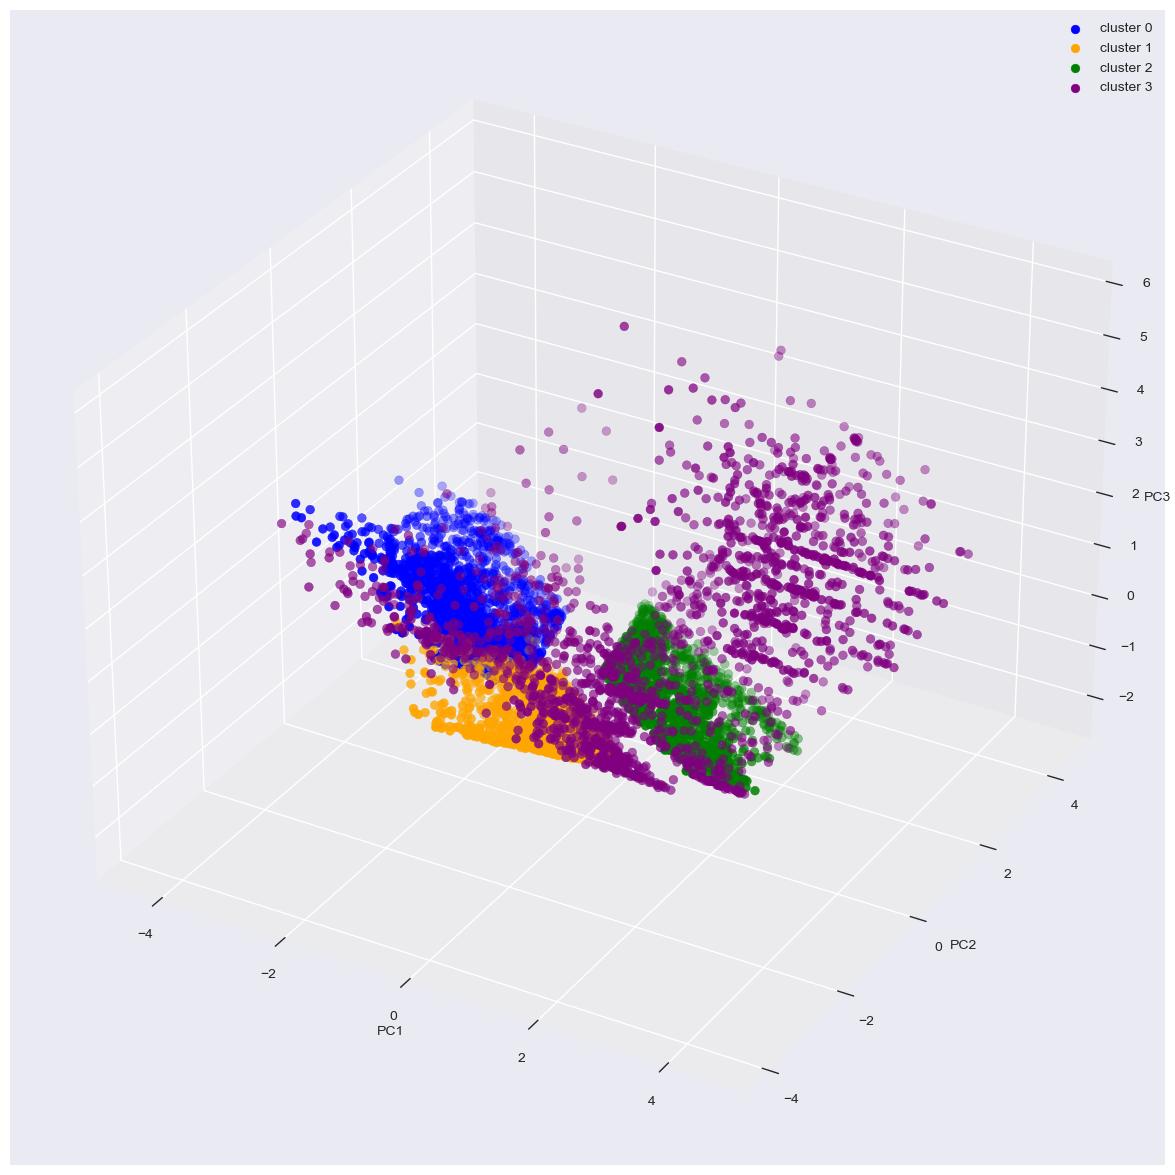

In [474]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_7 == 0,0],train_pca1[cluster_7 == 0,1],train_pca1[cluster_7 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_7 == 1,0],train_pca1[cluster_7 == 1,1],train_pca1[cluster_7 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_7 == 2,0],train_pca1[cluster_7 == 2,1],train_pca1[cluster_7 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_7 == 3,0],train_pca1[cluster_7 == 3,1],train_pca1[cluster_7 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
#ax.scatter(train_pca1[cluster_5 == 4,0],train_pca1[cluster_5 == 4,1],train_pca1[cluster_5 == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

'diag': Cada componente tiene una matriz de covarianza diagonal.

In [475]:
model_gmm_pca = GaussianMixture(n_components=4, random_state=123, covariance_type = 'diag').fit(train_pca1) #se puede variar la matriz de covariaza
#es mas un metodo para entender distribuciones

In [476]:
# --- Evaluación del modelo GMM ---
labels_ = model_gmm_pca.predict(train_pca1)
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(train_pca1, labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(train_pca1, labels_))

 ### DBSCAN ###
Silhouette Score:  0.29061840478095347
Calinski harabasz score:  3183.906729988493


In [477]:
##Predecir valores de etiquetas
cluster_8 = model_gmm_pca.fit_predict(train_pca1)
tablafinal["cluster_8"]=cluster_8

In [478]:
tablafinal["cluster_8"].unique()

array([1, 0, 2, 3], dtype=int64)

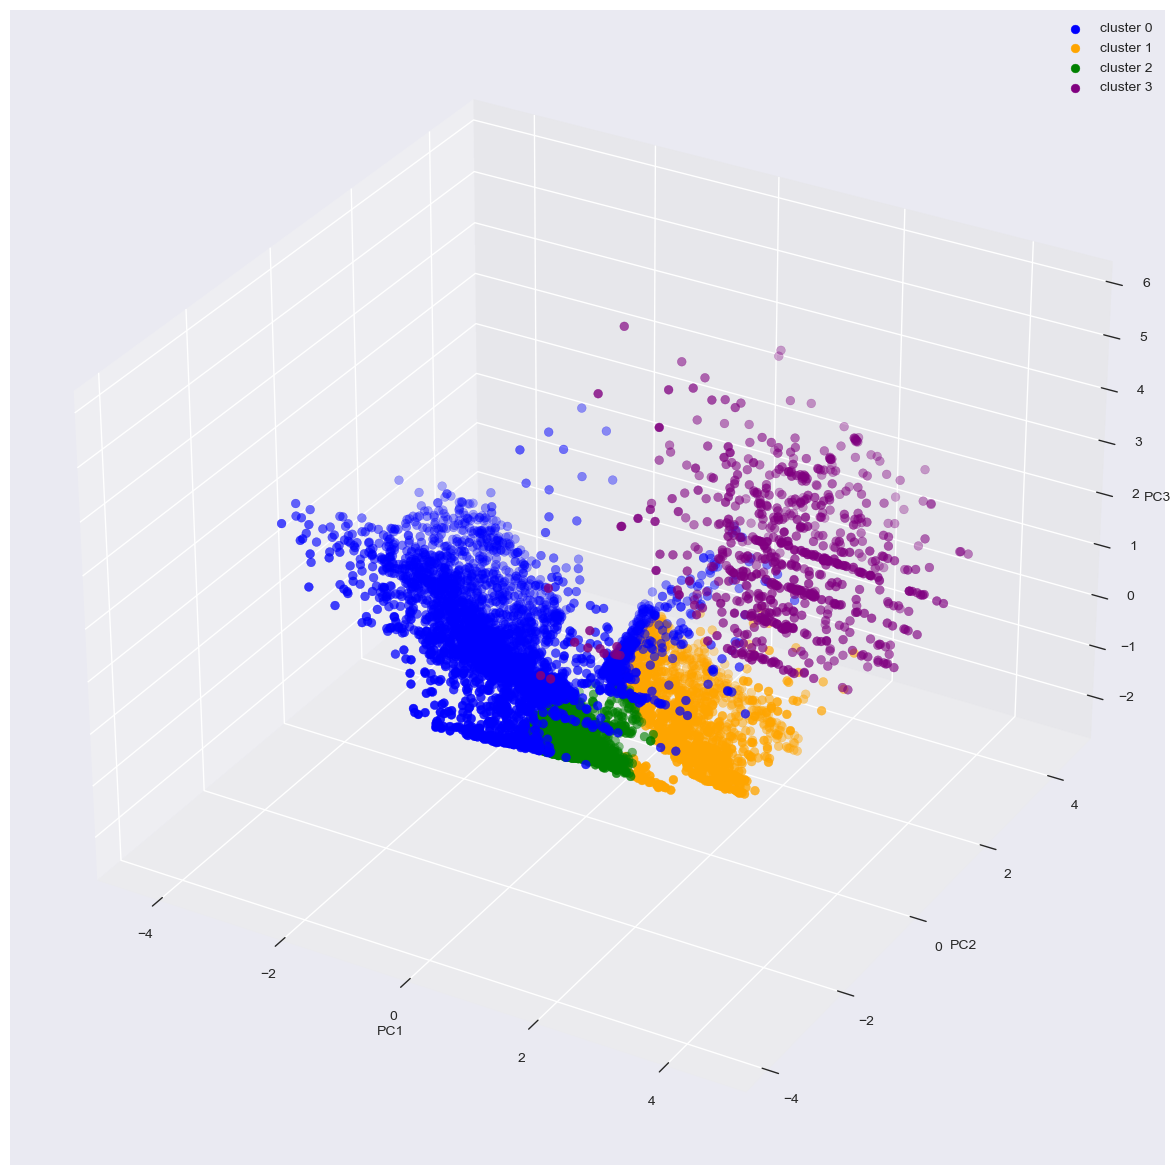

In [479]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca1[cluster_8 == 0,0],train_pca1[cluster_8 == 0,1],train_pca1[cluster_8 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(train_pca1[cluster_8 == 1,0],train_pca1[cluster_8 == 1,1],train_pca1[cluster_8 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(train_pca1[cluster_8 == 2,0],train_pca1[cluster_8 == 2,1],train_pca1[cluster_8 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(train_pca1[cluster_8 == 3,0],train_pca1[cluster_8 == 3,1],train_pca1[cluster_8 == 3,2], s = 40 , color = 'purple', label = "cluster 3")
#ax.scatter(train_pca1[cluster_5 == 4,0],train_pca1[cluster_5 == 4,1],train_pca1[cluster_5 == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()